In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math

In [2]:
df = pd.read_csv("/kaggle/input/ASNA-hackathon/train.csv")
df_test = pd.read_csv("/kaggle/input/ASNA-hackathon/test.csv")
sample = pd.read_csv("/kaggle/input/ASNA-hackathon/sample_submission.csv")

In [3]:
df.head()

,CustomerID,State,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Effective To Date,Employment Status,...,Policy Type,Policy Type Index,Policy,Policy Index,Renew Offer Type,Sales Channel,Sales Channel Index,Vehicle Size,Vehicle Size Index,Claim over 1k
0,QC35222,California,3622.69,No,Basic,0,Bachelor,2,1/1/2024,Employed,...,Corporate Auto,1,Corporate L2,4,3,Web,0,Medsize,1,0
1,AE98193,Washington,10610.21,No,Basic,0,High School or Below,0,1/1/2024,Unemployed,...,Personal Auto,0,Personal L1,0,1,Branch,1,Medsize,1,1
2,TM23514,Oregon,13868.02,No,Extended,1,College,1,1/1/2024,Employed,...,Personal Auto,0,Personal L3,2,3,Web,0,Medsize,1,0
3,QZ42725,Washington,3119.69,No,Basic,0,Bachelor,2,1/1/2024,Unemployed,...,Personal Auto,0,Personal L3,2,2,Agent,2,Medsize,1,0
4,SG81493,Arizona,5999.04,No,Premium,2,Bachelor,2,1/1/2024,Employed,...,Corporate Auto,1,Corporate L1,3,2,Web,0,Medsize,1,0


In [4]:
df_test.head()

,CustomerID,State,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Effective To Date,Employment Status,...,Number of Policies,Policy Type,Policy Type Index,Policy,Policy Index,Renew Offer Type,Sales Channel,Sales Channel Index,Vehicle Size,Vehicle Size Index
0,WB38524,California,4008.95,No,Basic,0,High School or Below,0,1/1/2024,Employed,...,1,Personal Auto,0,Personal L3,2,2,Branch,1,Small,0
1,QP80741,Washington,8165.58,No,Basic,0,College,1,1/1/2024,Unemployed,...,2,Corporate Auto,1,Corporate L1,3,3,Agent,2,Medsize,1
2,WP41146,California,7210.94,No,Basic,0,High School or Below,0,1/1/2024,Unemployed,...,7,Personal Auto,0,Personal L2,1,1,Branch,1,Medsize,1
3,KR62797,Arizona,6198.70,No,Basic,0,High School or Below,0,1/1/2024,Employed,...,1,Personal Auto,0,Personal L2,1,2,Call Center,3,Medsize,1
4,VE55982,Nevada,3570.32,No,Basic,0,Bachelor,2,1/1/2024,Employed,...,1,Corporate Auto,1,Corporate L1,3,1,Call Center,3,Medsize,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     7290 non-null   object 
 1   State                          7290 non-null   object 
 2   Customer Lifetime Value        7290 non-null   float64
 3   Response                       7290 non-null   object 
 4   Coverage                       7290 non-null   object 
 5   Coverage Index                 7290 non-null   int64  
 6   Education                      7290 non-null   object 
 7   Education Index                7290 non-null   int64  
 8   Effective To Date              7290 non-null   object 
 9   Employment Status              7290 non-null   object 
 10  Employment Status Index        7290 non-null   int64  
 11  Gender                         7290 non-null   object 
 12  Income                         7290 non-null   i

In [6]:
df.describe()

,Customer Lifetime Value,Coverage Index,Education Index,Employment Status Index,Income,Marital Status Index,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type Index,Policy Index,Renew Offer Type,Sales Channel Index,Vehicle Size Index,Claim over 1k
count,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000
mean,10798.116623,0.490261,1.287243,0.985597,50573.282579,0.878189,20.514678,65.164335,0.379287,2.978875,0.300000,2.216735,1.964472,1.622497,0.913717,0.114129
std,9180.878153,0.658827,1.079150,0.910412,41090.968142,0.638740,13.626412,37.656121,0.903361,2.404229,0.543978,1.785506,1.004708,0.956533,0.534543,0.317990
min,2562.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5374.027500,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,32.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,7845.015000,0.000000,1.000000,1.000000,45398.500000,1.000000,19.000000,65.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,0.000000
75%,12152.585000,1.000000,2.000000,1.000000,83655.750000,1.000000,31.000000,96.000000,0.000000,4.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000
max,100208.500000,2.000000,4.000000,4.000000,134947.000000,2.000000,47.000000,134.000000,5.000000,9.000000,2.000000,8.000000,4.000000,3.000000,2.000000,1.000000


In [7]:
df.shape

(7290, 29)

In [8]:
df.isna().sum()

CustomerID                       0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Coverage Index                   0
Education                        0
Education Index                  0
Effective To Date                0
Employment Status                0
Employment Status Index          0
Gender                           0
Income                           0
Marital Status                   0
Marital Status Index             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy Type Index                0
Policy                           0
Policy Index                     0
Renew Offer Type                 0
Sales Channel                    0
Sales Channel Index              0
Vehicle Size                     0
Vehicle Size Index               0
Claim over 1k       

# EDA

In [9]:
df['Claim over 1k'].value_counts()

Claim over 1k
0    6458
1     832
Name: count, dtype: int64

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns
categoric_cols = df.select_dtypes(exclude=['number']).columns
print(len(numeric_cols), len(categoric_cols))
print(numeric_cols)
print(categoric_cols)

16 13
Index(['Customer Lifetime Value', 'Coverage Index', 'Education Index',
       'Employment Status Index', 'Income', 'Marital Status Index',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type Index',
       'Policy Index', 'Renew Offer Type', 'Sales Channel Index',
       'Vehicle Size Index', 'Claim over 1k'],
      dtype='object')
Index(['CustomerID', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'Employment Status', 'Gender', 'Marital Status',
       'Policy Type', 'Policy', 'Sales Channel', 'Vehicle Size'],
      dtype='object')


In [11]:
indexed_cols_pairs = []
indexed_cols = []
for cat_col in categoric_cols:
    for num_col in numeric_cols:
        if cat_col + ' Index' == num_col:
            indexed_cols_pairs.append([num_col, cat_col])
            indexed_cols.append(num_col)

non_index_cols = ['CustomerID', 'Effective To Date', 'State', 'Response', 'Gender']
actual_numeric_cols = [col for col in numeric_cols if col not in indexed_cols]
print('Already indexed', len(indexed_cols))
print(indexed_cols)
print('Not indexed', len(non_index_cols))
print(non_index_cols)
print('Actual numeric', len(actual_numeric_cols))
print(actual_numeric_cols)

Already indexed 8
['Coverage Index', 'Education Index', 'Employment Status Index', 'Marital Status Index', 'Policy Type Index', 'Policy Index', 'Sales Channel Index', 'Vehicle Size Index']
Not indexed 5
['CustomerID', 'Effective To Date', 'State', 'Response', 'Gender']
Actual numeric 8
['Customer Lifetime Value', 'Income', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type', 'Claim over 1k']


## Categorical

In [12]:
def plot_bar_charts(df, columns):
    num_columns = len(columns)
    num_rows = math.ceil(num_columns / 3)
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        value_counts = df[col].value_counts()

        sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=axes[i])
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].set_title(f'{col} Distribution')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

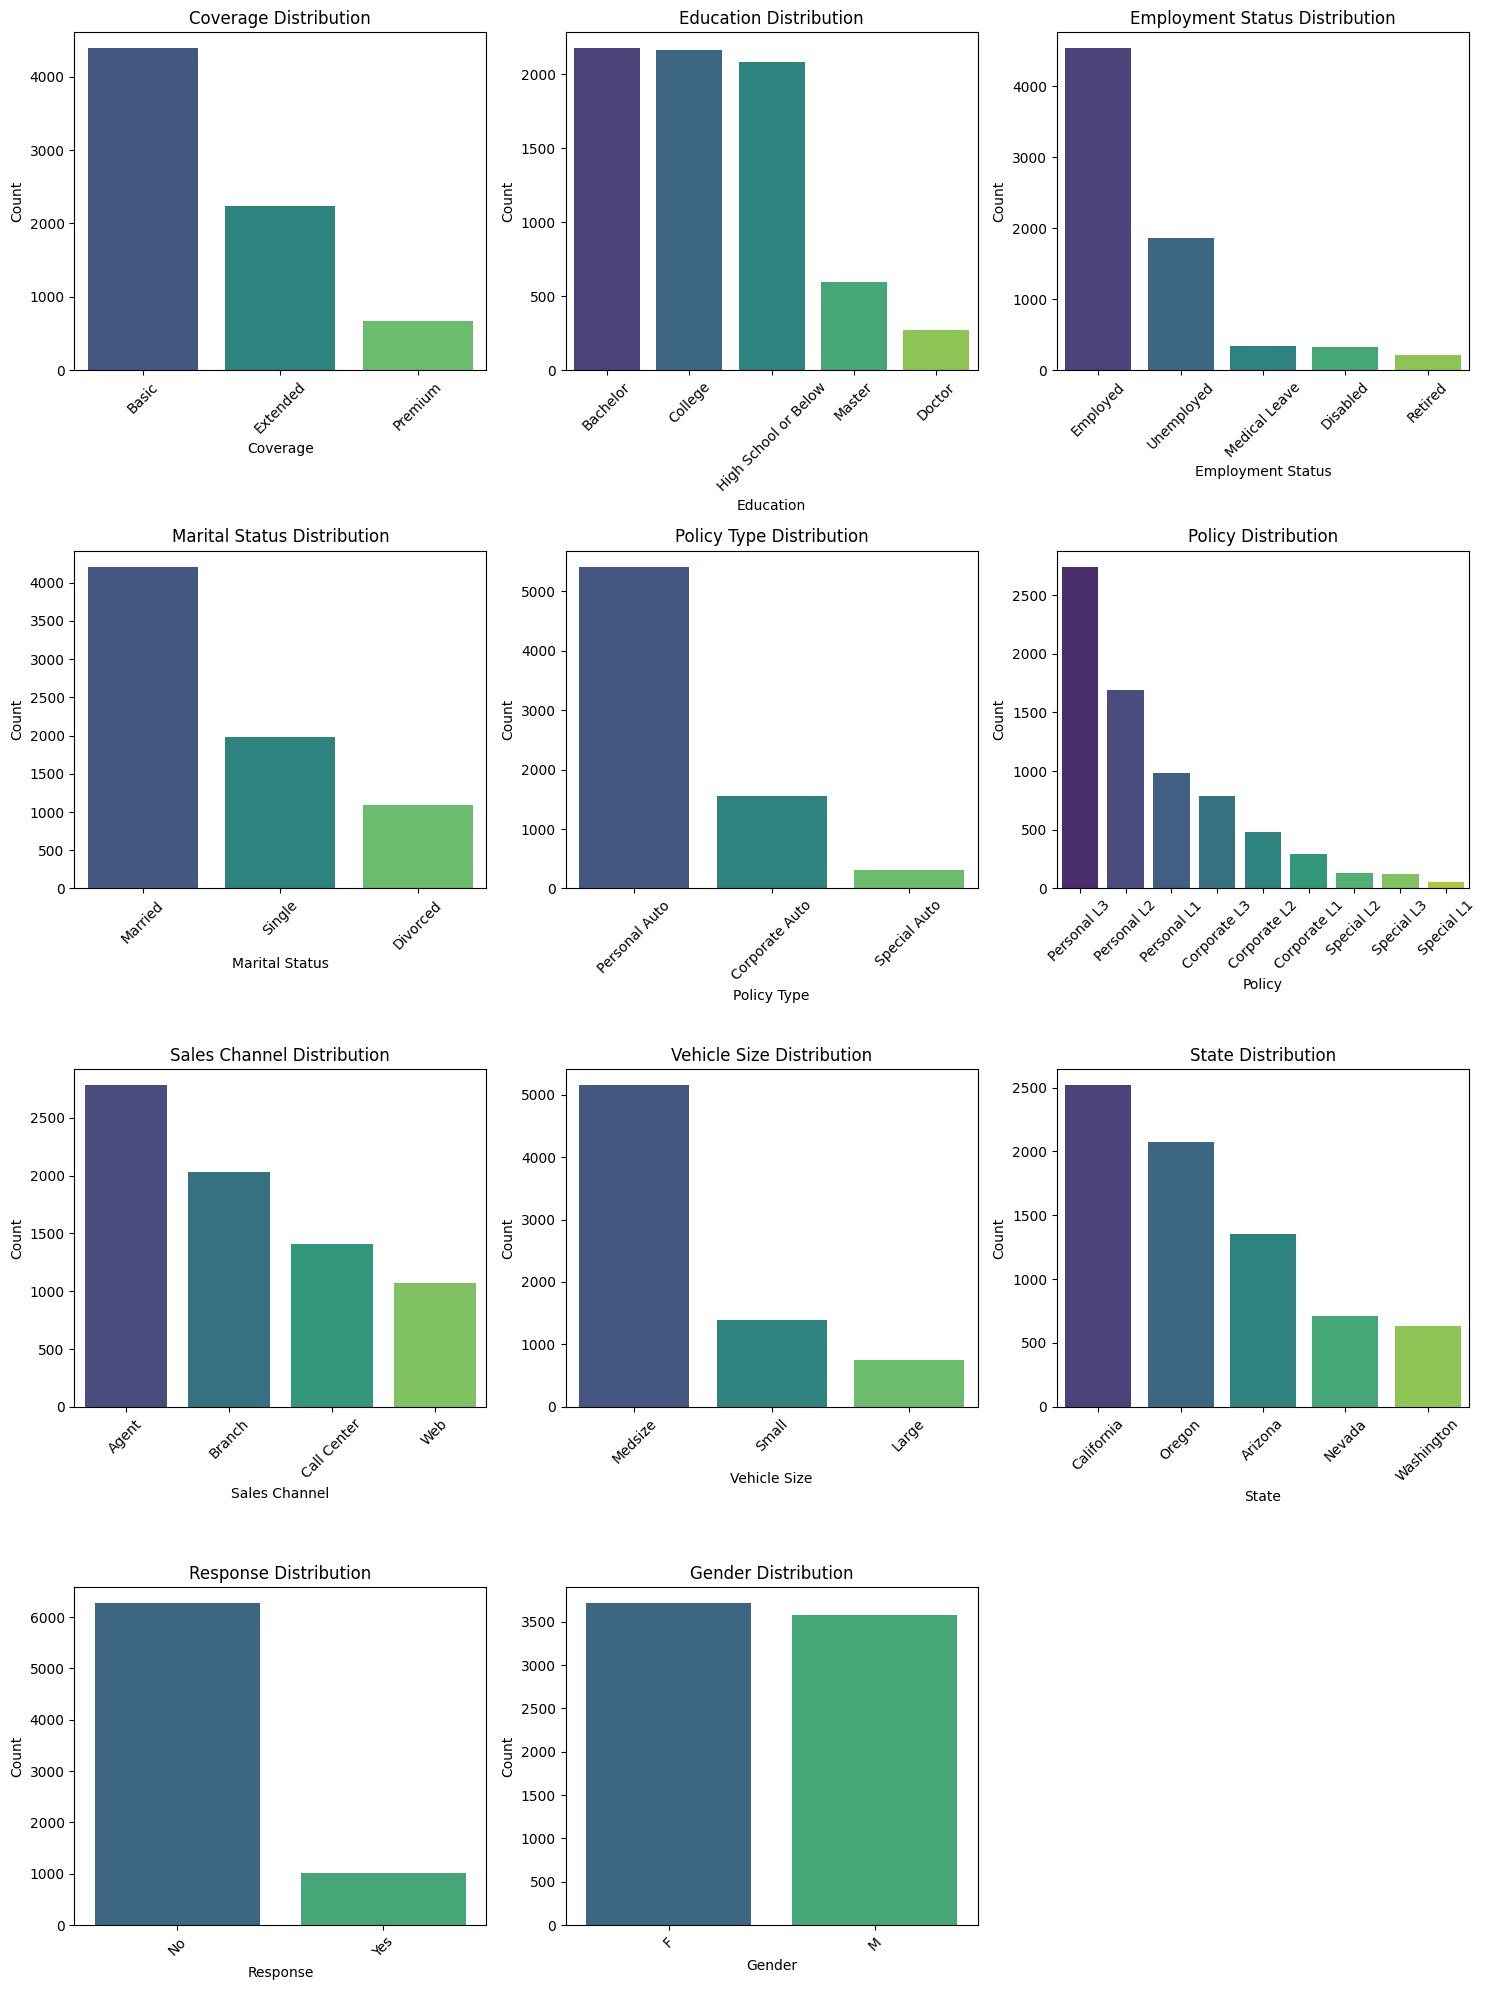

In [13]:
plot_bar_charts(df, [col[1] for col in indexed_cols_pairs] + non_index_cols[2:])

In [14]:
for idx_col in indexed_cols_pairs:
    print(df[idx_col].value_counts())

Coverage Index  Coverage
0               Basic       4387
1               Extended    2232
2               Premium      671
Name: count, dtype: int64
Education Index  Education           
2                Bachelor                2175
1                College                 2163
0                High School or Below    2086
3                Master                   593
4                Doctor                   273
Name: count, dtype: int64
Employment Status Index  Employment Status
1                        Employed             4536
0                        Unemployed           1868
2                        Medical Leave         338
4                        Disabled              329
3                        Retired               219
Name: count, dtype: int64
Marital Status Index  Marital Status
1                     Married           4208
0                     Single            1985
2                     Divorced          1097
Name: count, dtype: int64
Policy Type Index  Policy Type   


In [15]:
policy_distribution = df[['Policy Type', 'Policy', 'Claim over 1k']].groupby(['Policy Type', 'Policy']).agg(over1k = ('Claim over 1k', 'sum'), total=('Claim over 1k', 'count'))
policy_distribution['under1k'] = policy_distribution['total'] - policy_distribution['over1k']
policy_distribution['under1k_prop'] = policy_distribution['under1k'] / policy_distribution['total']
policy_distribution['over1k_prop'] = policy_distribution['over1k'] / policy_distribution['total']
policy_distribution

over1k  total  under1k  under1k_prop  over1k_prop
Policy Type    Policy                                                         
Corporate Auto Corporate L1      33    298      265      0.889262     0.110738
               Corporate L2      53    477      424      0.888889     0.111111
               Corporate L3      89    786      697      0.886768     0.113232
Personal Auto  Personal L1      120    986      866      0.878296     0.121704
               Personal L2      196   1689     1493      0.883955     0.116045
               Personal L3      303   2741     2438      0.889456     0.110544
Special Auto   Special L1        11     58       47      0.810345     0.189655
               Special L2        14    131      117      0.893130     0.106870
               Special L3        13    124      111      0.895161     0.104839

In [16]:
df[non_index_cols]

,CustomerID,Effective To Date,State,Response,Gender
0,QC35222,1/1/2024,California,No,F
1,AE98193,1/1/2024,Washington,No,M
2,TM23514,1/1/2024,Oregon,No,M
3,QZ42725,1/1/2024,Washington,No,F
4,SG81493,1/1/2024,Arizona,No,M
...,...,...,...,...,...
7285,HC90344,9/2/2024,California,No,F
7286,ZU83252,9/2/2024,California,No,F
7287,PR80703,9/2/2024,California,No,F
7288,NS23754,9/2/2024,California,No,F


In [17]:
df['State'].value_counts()

State
California    2520
Oregon        2077
Arizona       1353
Nevada         708
Washington     632
Name: count, dtype: int64

In [18]:
df['Response'].value_counts()

Response
No     6265
Yes    1025
Name: count, dtype: int64

In [19]:
df['Gender'].value_counts()

Gender
F    3711
M    3579
Name: count, dtype: int64

## Numeric

In [20]:
print(actual_numeric_cols)
print('Actual numeric', len(actual_numeric_cols))

['Customer Lifetime Value', 'Income', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type', 'Claim over 1k']
Actual numeric 8


In [21]:
def plot_eachfeature(graph_type):
    fig, axes = plt.subplots(nrows=2, ncols=int(len(actual_numeric_cols)/2), figsize=(20,16))

    axes = axes.flatten()

    for i in range(len(actual_numeric_cols)):
        graph_type(df[actual_numeric_cols[i]], ax=axes[i])
        axes[i].set_xlabel(actual_numeric_cols[i])

    fig.tight_layout()
    plt.show()

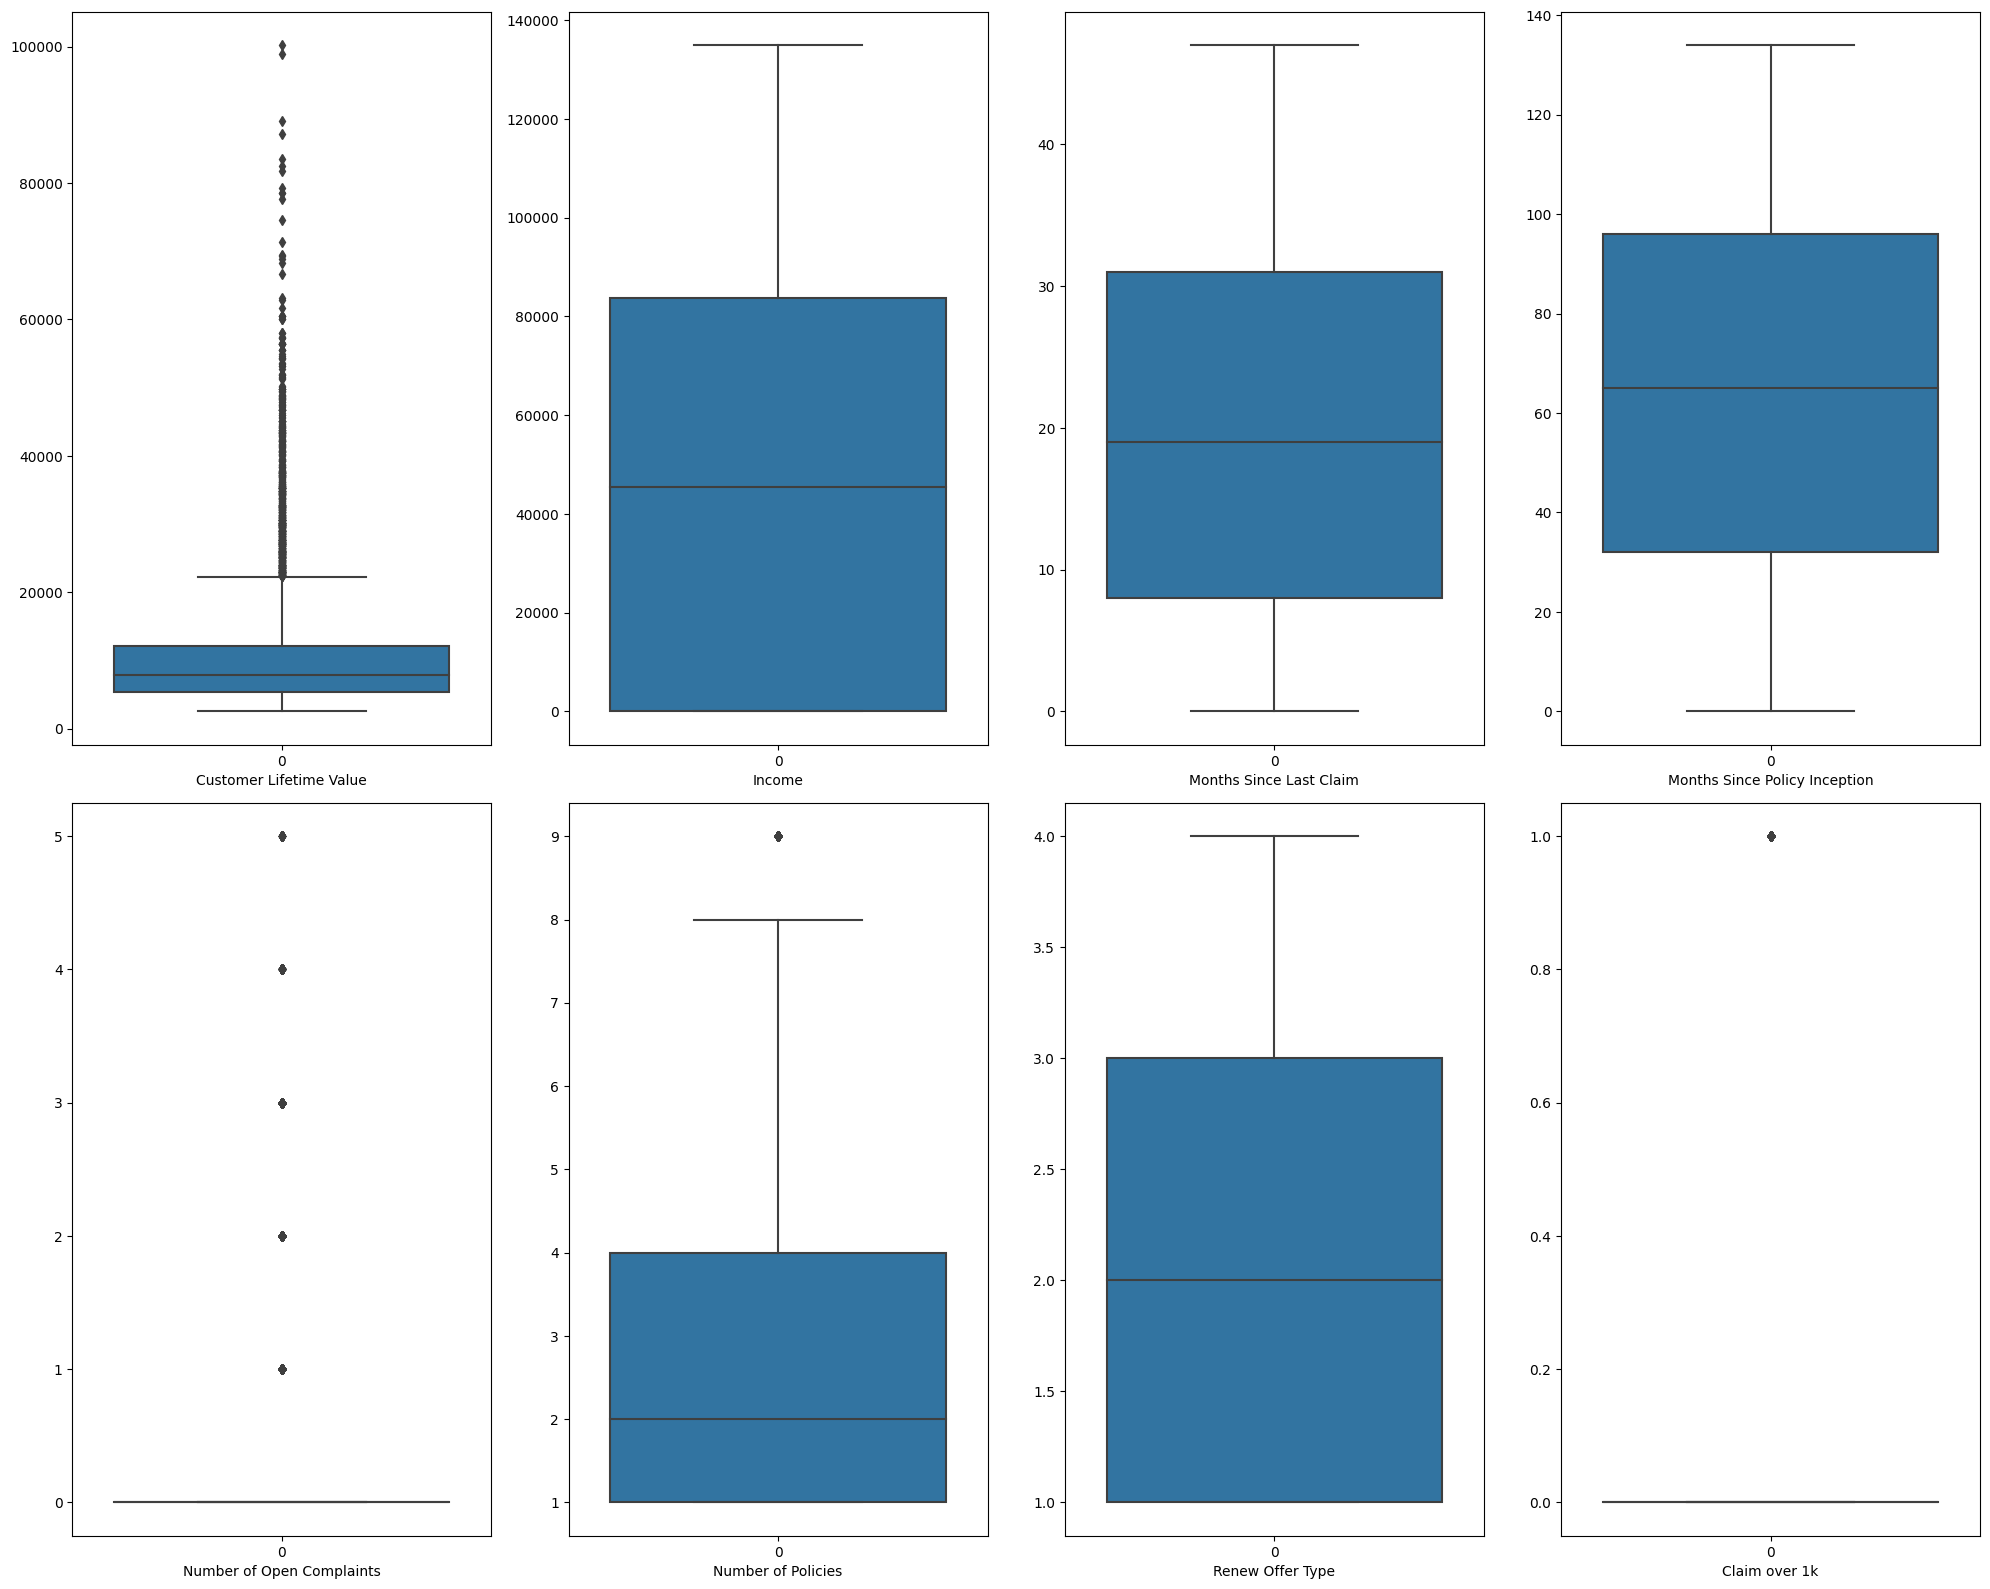

In [22]:
plot_eachfeature(sns.boxplot)

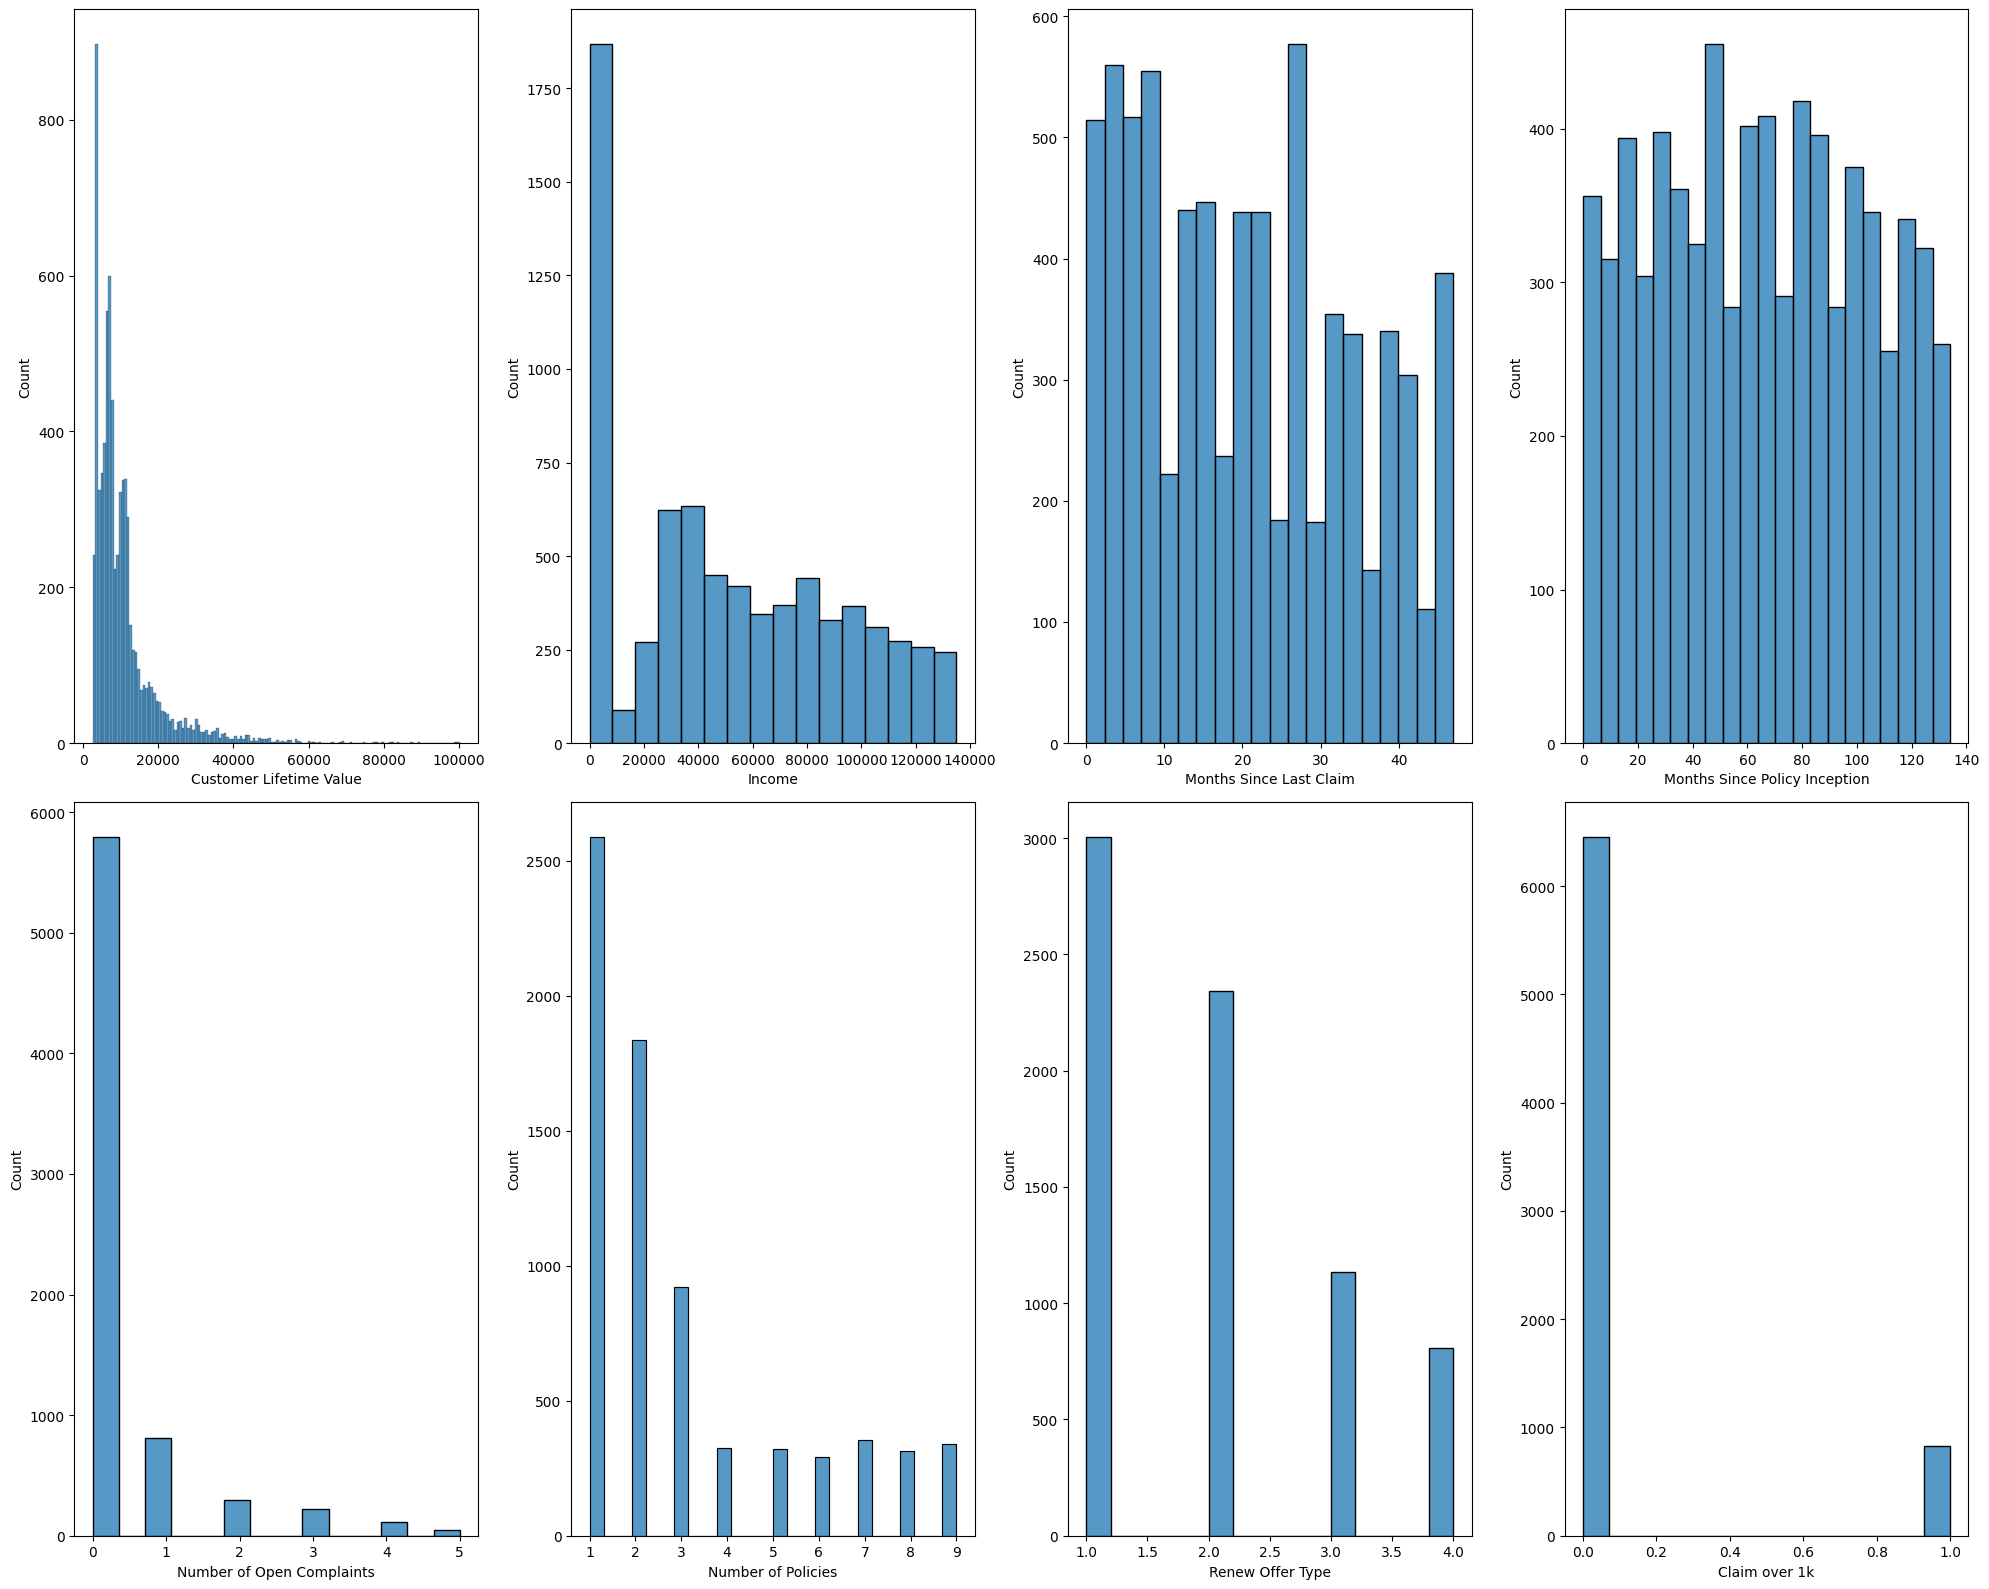

In [23]:
warnings.filterwarnings("ignore")
plot_eachfeature(sns.histplot)

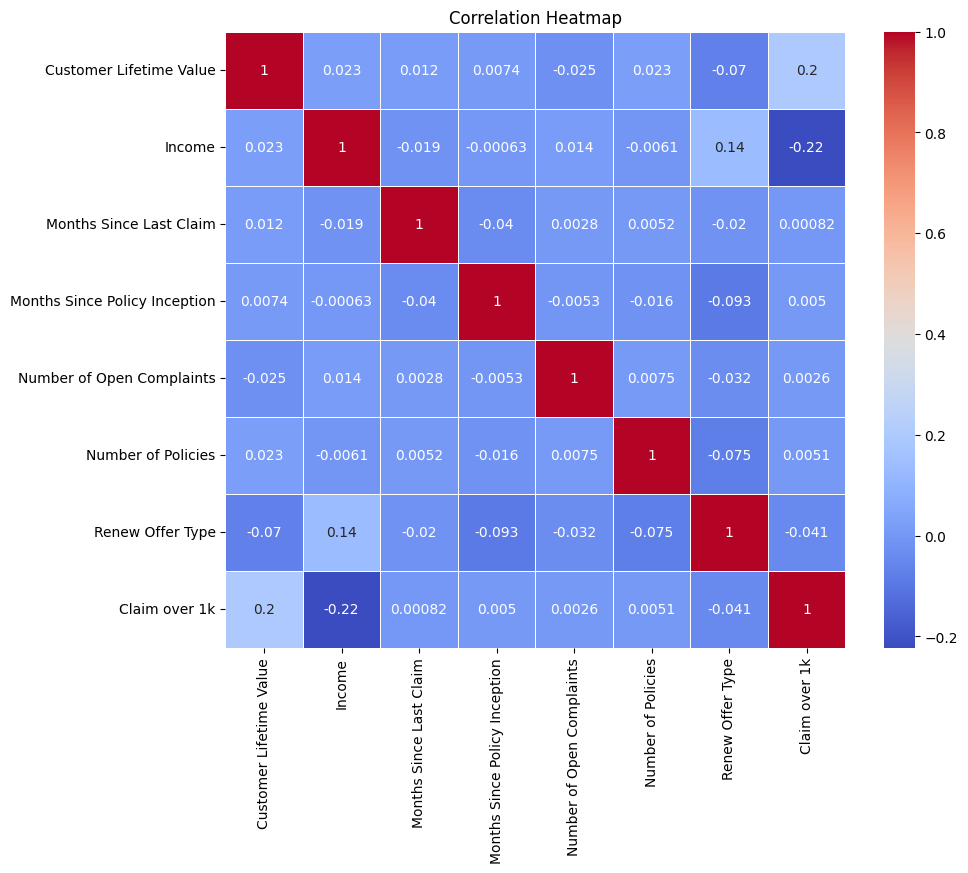

In [24]:
corr_matrix = df[actual_numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
df['Number of Policies']

0       1
1       7
2       3
3       1
4       1
       ..
7285    2
7286    2
7287    9
7288    1
7289    1
Name: Number of Policies, Length: 7290, dtype: int64

## Each policy level

In [26]:
policy = ['Corporate', 'Personal', 'Special']
l1 = [policy_type + ' L1' for policy_type in policy]
l2 = [policy_type + ' L3' for policy_type in policy]
l3 = [policy_type + ' L3' for policy_type in policy]
df_l1 = df[df['Policy'].isin(l1)]
df_l2 = df[df['Policy'].isin(l2)]
df_l3 = df[df['Policy'].isin(l3)]

In [27]:
def plot_policy_levels(input_feature):
    edu_l1 = df_l1[input_feature].value_counts()
    edu_l2 = df_l2[input_feature].value_counts()
    edu_l3 = df_l3[input_feature].value_counts()

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].bar(edu_l1.index, edu_l1.values, color='blue')
    ax[0].set_title(input_feature + ' Distribution for L1 Policies')
    ax[0].set_xlabel(input_feature)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)

    ax[1].bar(edu_l2.index, edu_l2.values, color='green')
    ax[1].set_title(input_feature + ' Distribution for L2 Policies')
    ax[1].set_xlabel(input_feature)
    ax[1].tick_params(axis='x', rotation=45)

    ax[2].bar(edu_l3.index, edu_l3.values, color='red')
    ax[2].set_title(input_feature + ' Distribution for L3 Policies')
    ax[2].set_xlabel(input_feature)
    ax[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

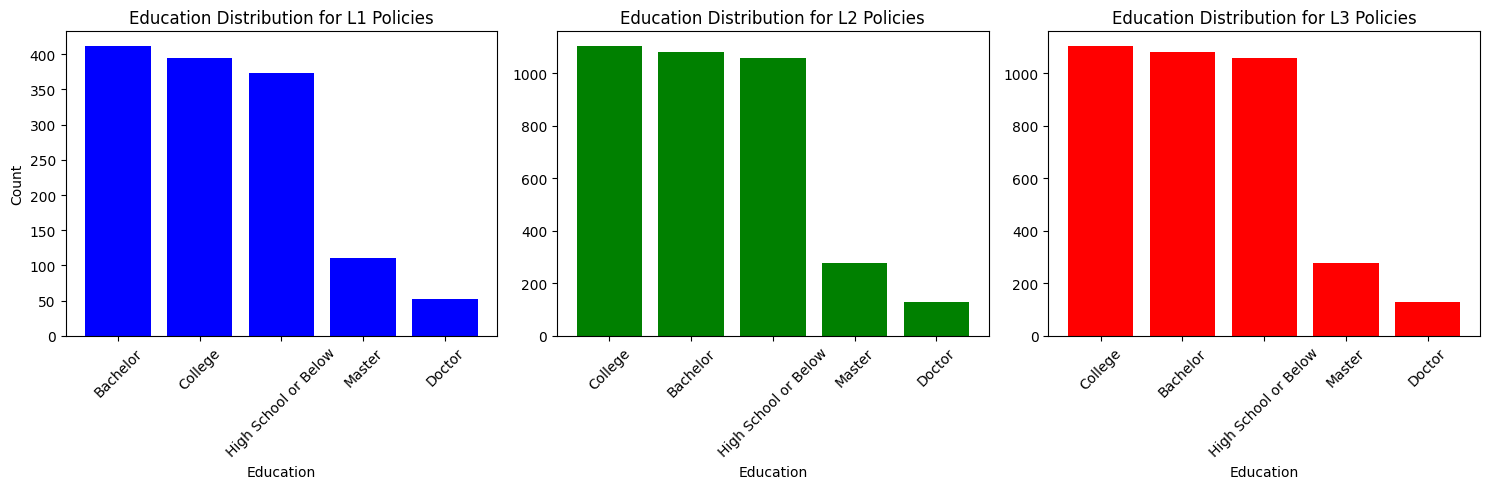

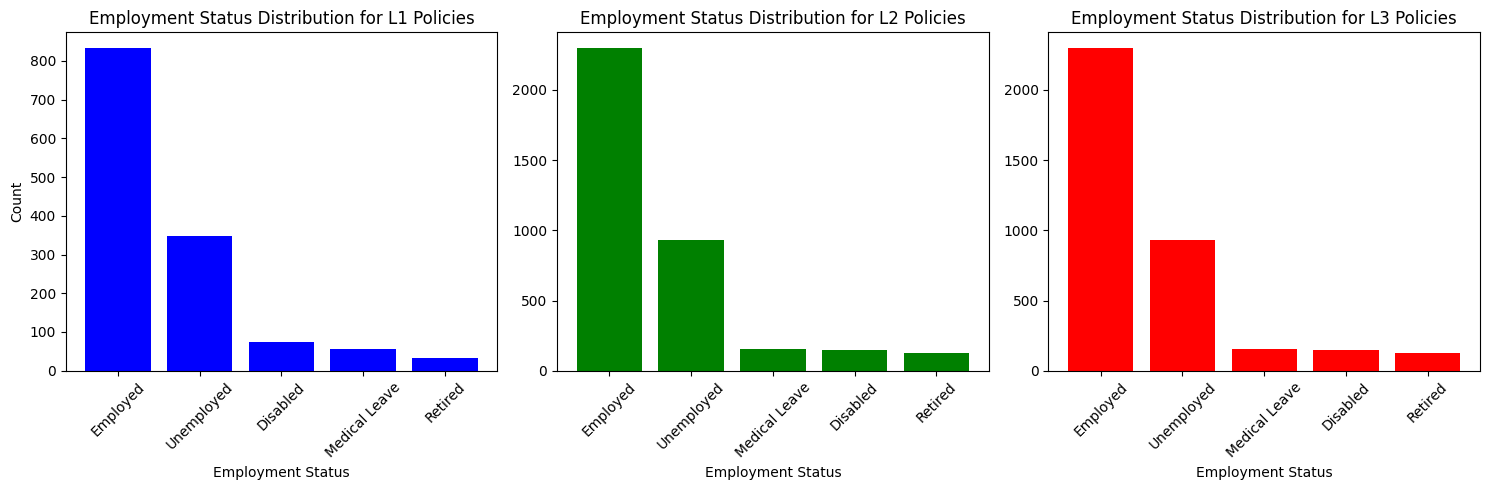

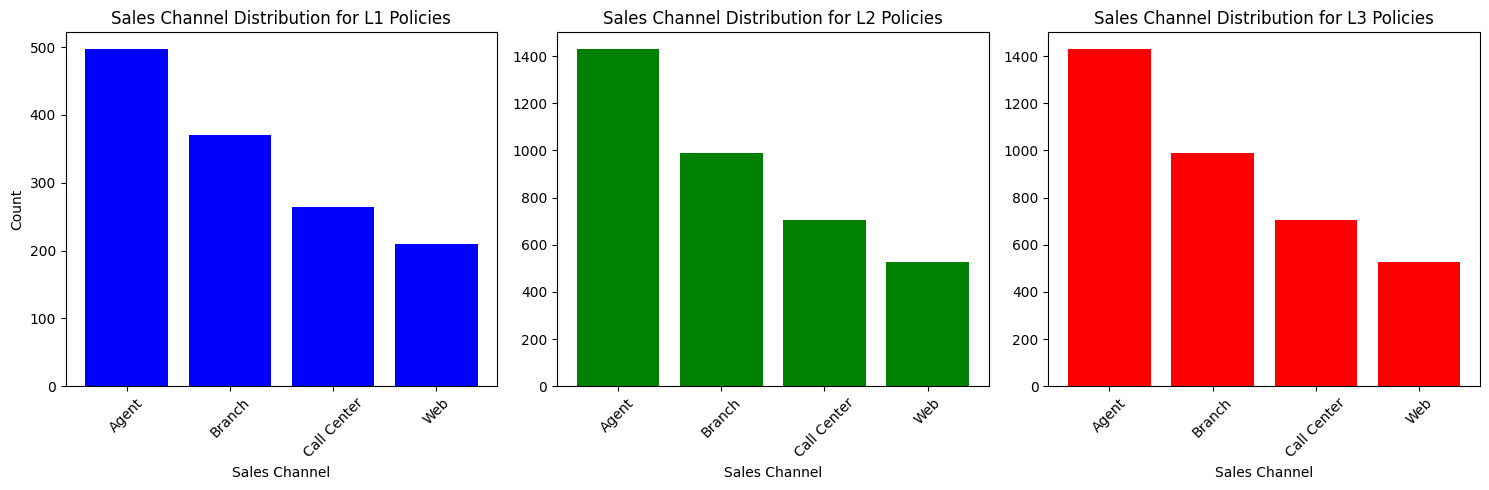

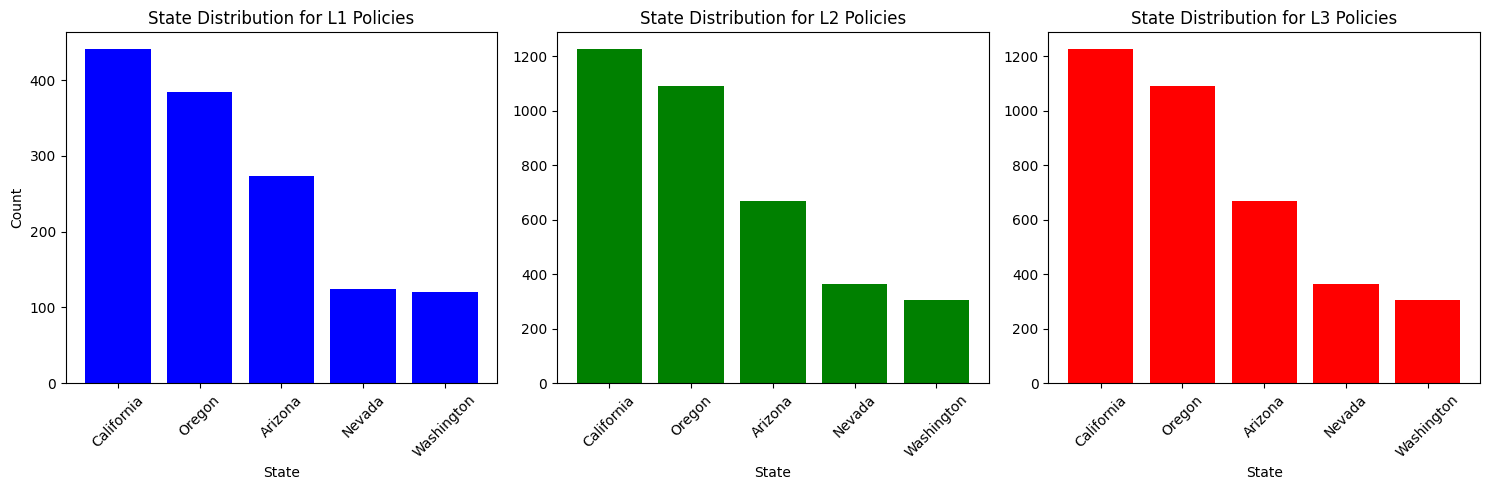

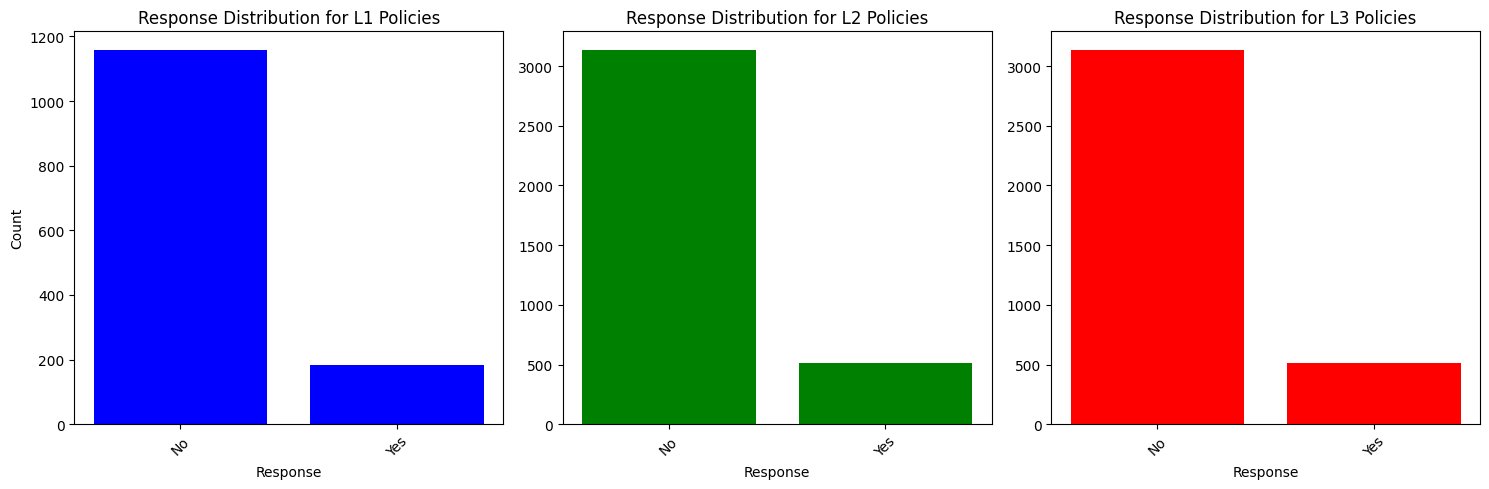

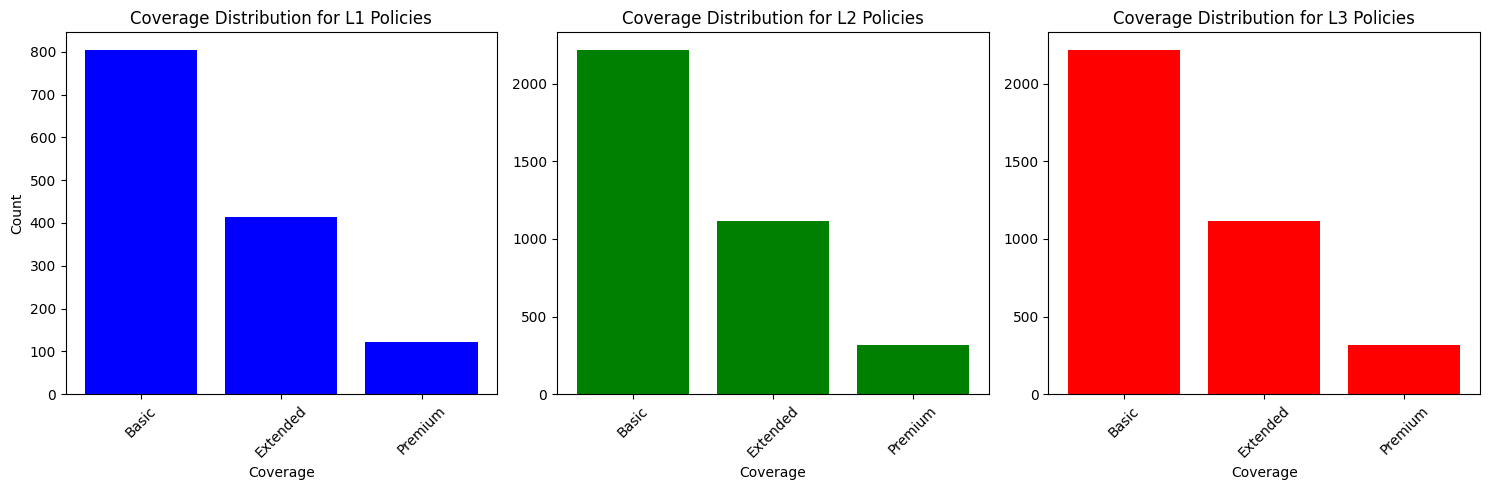

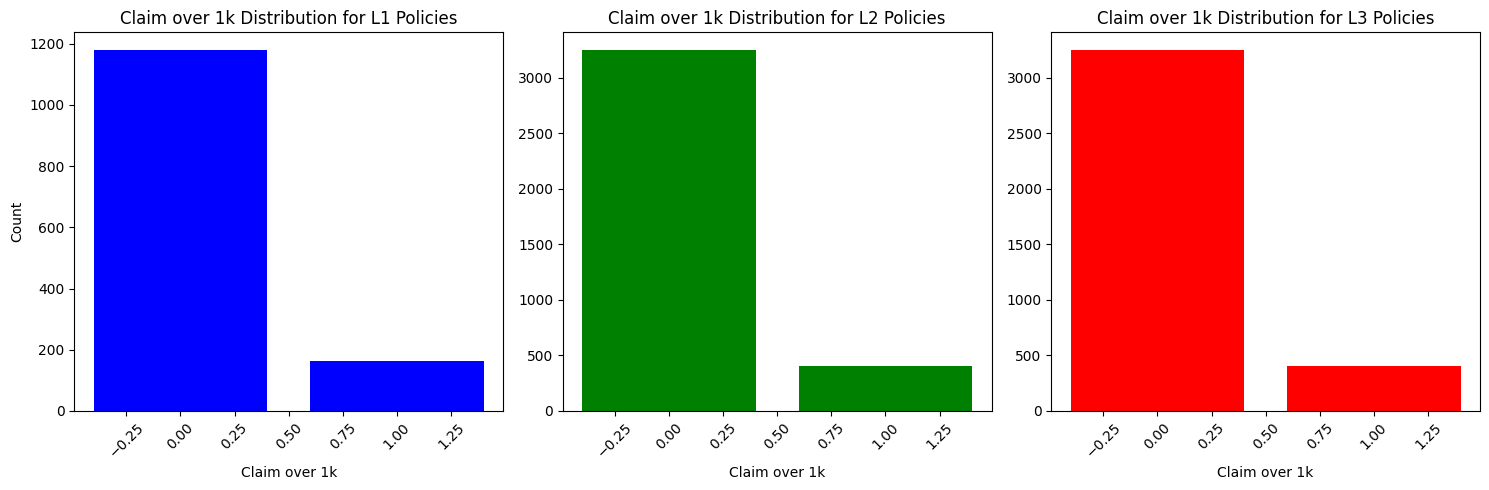

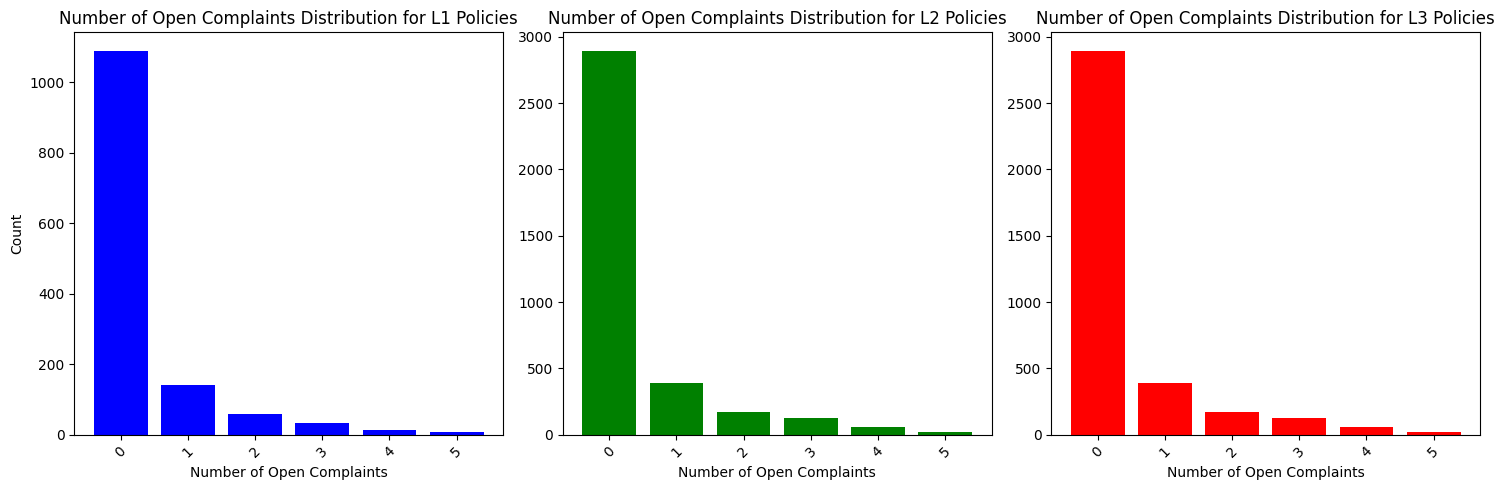

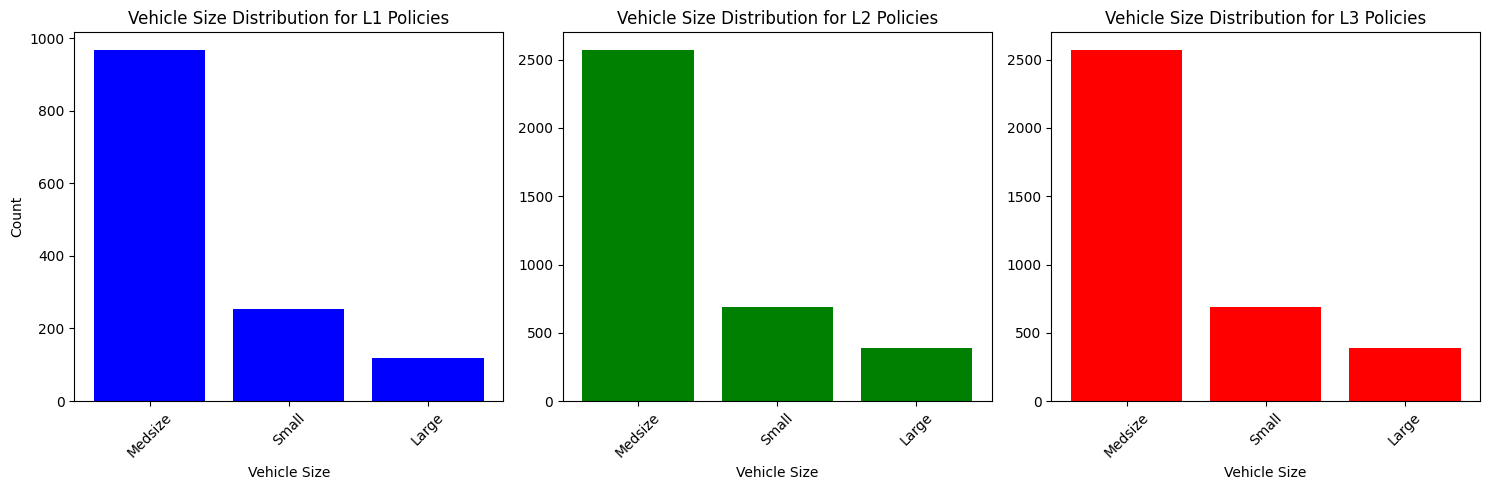

In [28]:
plot_policy_levels('Education')
plot_policy_levels('Employment Status')
plot_policy_levels('Sales Channel')
plot_policy_levels('State')
plot_policy_levels('Response')
plot_policy_levels('Coverage')
plot_policy_levels('Claim over 1k')
plot_policy_levels('Number of Open Complaints')
plot_policy_levels('Vehicle Size')

In [29]:
def plot_policy_levels(input_feature):

    values_l1 = df_l1[input_feature].dropna()
    values_l2 = df_l2[input_feature].dropna()
    values_l3 = df_l3[input_feature].dropna()

    fig, ax = plt.subplots(figsize=(5, 5))

    data = [values_l1, values_l2, values_l3]

    ax.boxplot(data, patch_artist=True, labels=['L1 Policies', 'L2 Policies', 'L3 Policies'])

    ax.set_title(input_feature + ' Box Plot Distribution')
    ax.set_ylabel(input_feature)

    plt.tight_layout()
    plt.show()


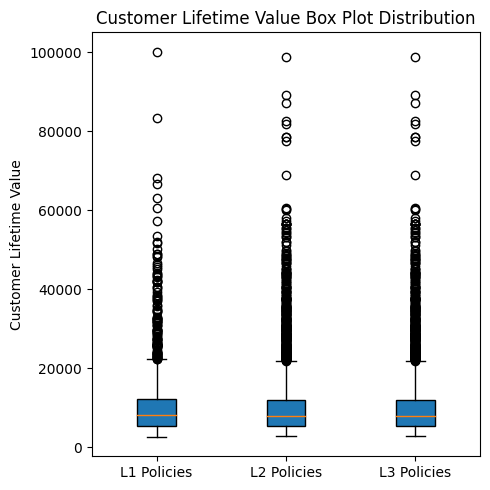

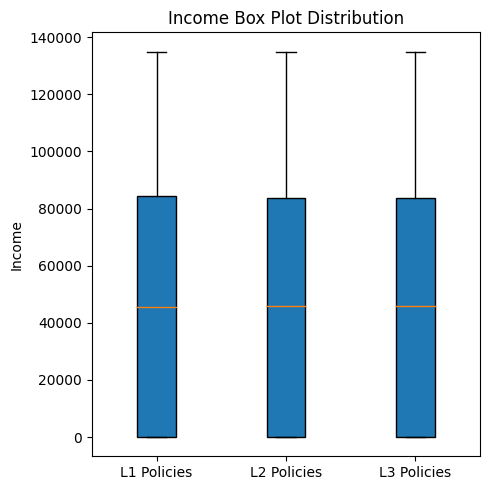

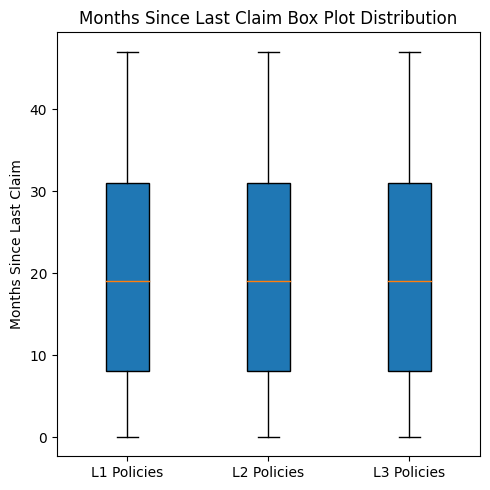

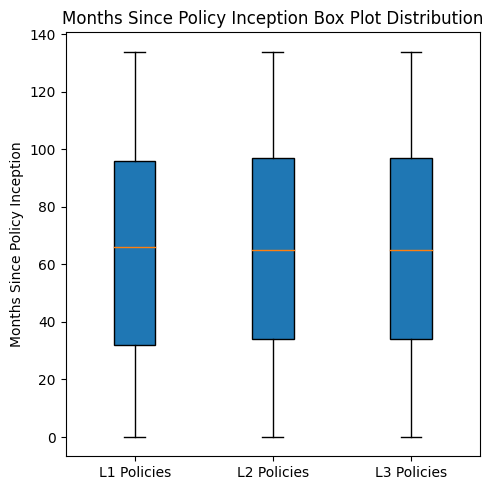

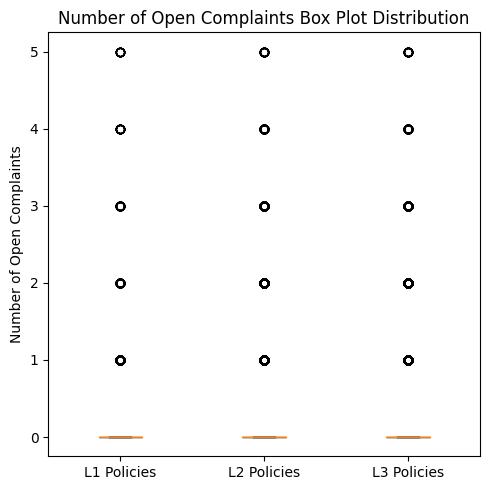

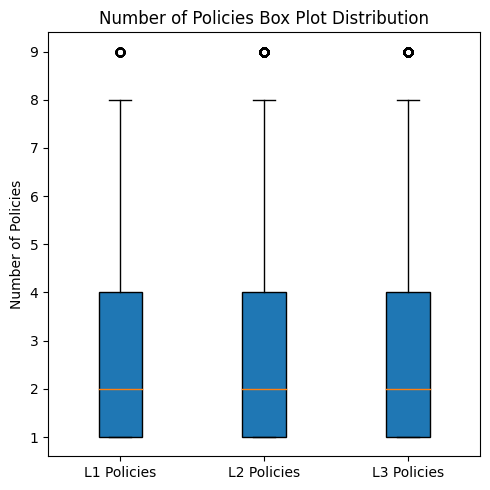

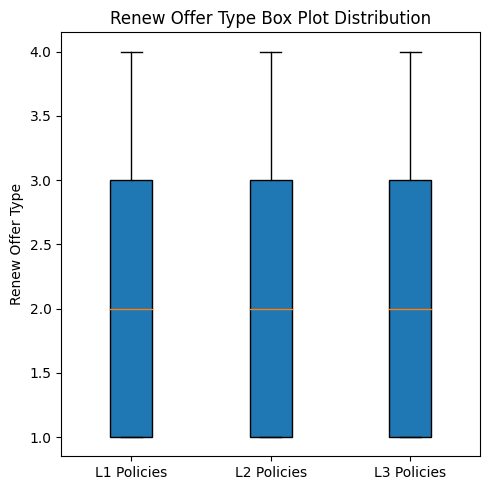

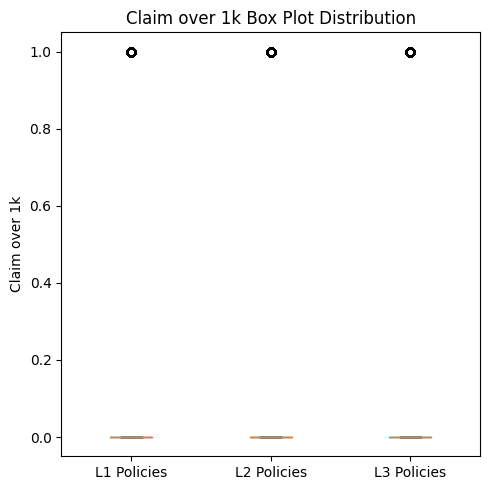

In [30]:
for feature in actual_numeric_cols:
    plot_policy_levels(feature)

In [31]:
print(df_l1['Claim over 1k'].value_counts() / df_l1['Claim over 1k'].shape[0])
print(df_l2['Claim over 1k'].value_counts() / df_l2['Claim over 1k'].shape[0])
print(df_l3['Claim over 1k'].value_counts() / df_l3['Claim over 1k'].shape[0])

Claim over 1k
0    0.877794
1    0.122206
Name: count, dtype: float64
Claim over 1k
0    0.889071
1    0.110929
Name: count, dtype: float64
Claim over 1k
0    0.889071
1    0.110929
Name: count, dtype: float64


There is no difference :)

## Each Coverage

In [32]:
df_basic = df[df['Coverage']=='Basic']
df_extended = df[df['Coverage']=='Extended']
df_premium = df[df['Coverage']=='Premium']

df_basic.shape, df_extended.shape, df_premium.shape

((4387, 29), (2232, 29), (671, 29))

In [33]:
def plot_coverage(input_feature):
    edu_l1 = df_basic[input_feature].value_counts()
    edu_l2 = df_extended[input_feature].value_counts()
    edu_l3 = df_premium[input_feature].value_counts()

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].bar(edu_l1.index, edu_l1.values, color='blue')
    ax[0].set_title(input_feature + ' Distribution for Basic')
    ax[0].set_xlabel(input_feature)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)

    ax[1].bar(edu_l2.index, edu_l2.values, color='green')
    ax[1].set_title(input_feature + ' Distribution for Extended')
    ax[1].set_xlabel(input_feature)
    ax[1].tick_params(axis='x', rotation=45)

    ax[2].bar(edu_l3.index, edu_l3.values, color='red')
    ax[2].set_title(input_feature + ' Distribution for Premium')
    ax[2].set_xlabel(input_feature)
    ax[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_coverage_cont(input_feature):

    values_l1 = df_basic[input_feature].dropna()
    values_l2 = df_extended[input_feature].dropna()
    values_l3 = df_premium[input_feature].dropna()

    fig, ax = plt.subplots(figsize=(5, 5))

    data = [values_l1, values_l2, values_l3]

    ax.boxplot(data, patch_artist=True, labels=['Basic', 'Extended', 'Premium'])

    ax.set_title(input_feature + ' Box Plot Distribution')
    ax.set_ylabel(input_feature)

    plt.tight_layout()
    plt.show()

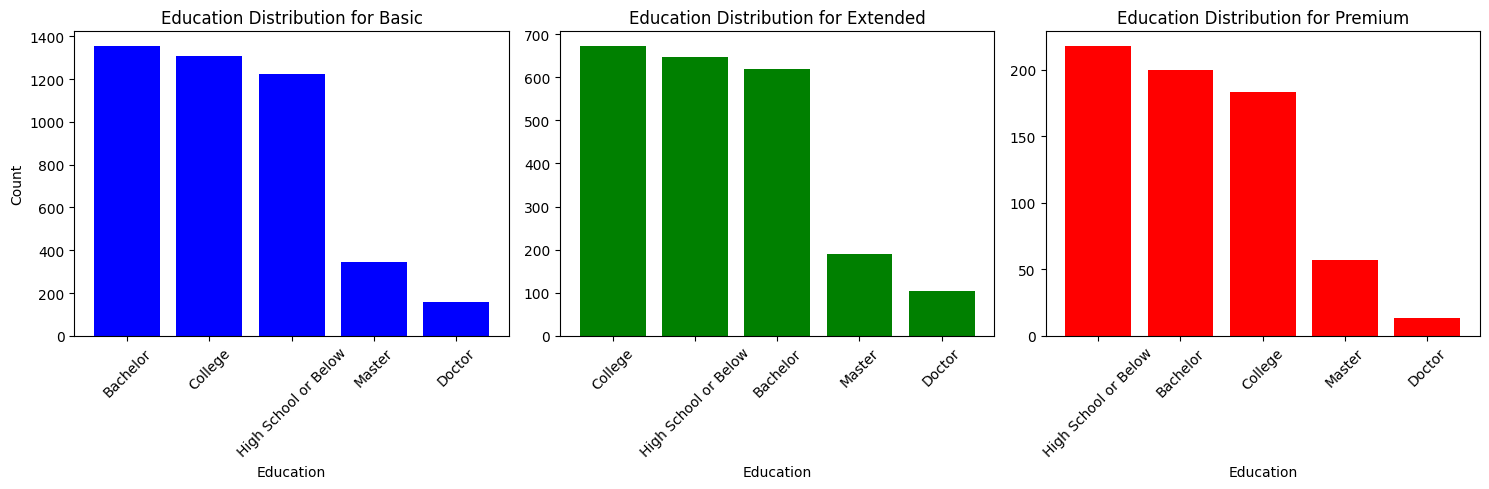

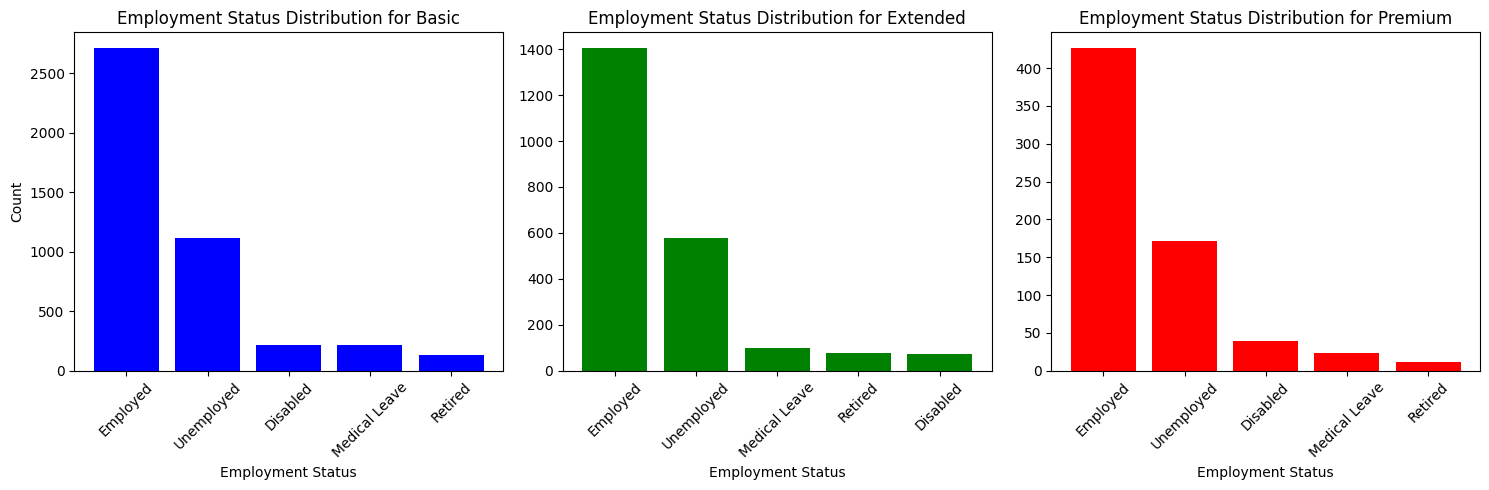

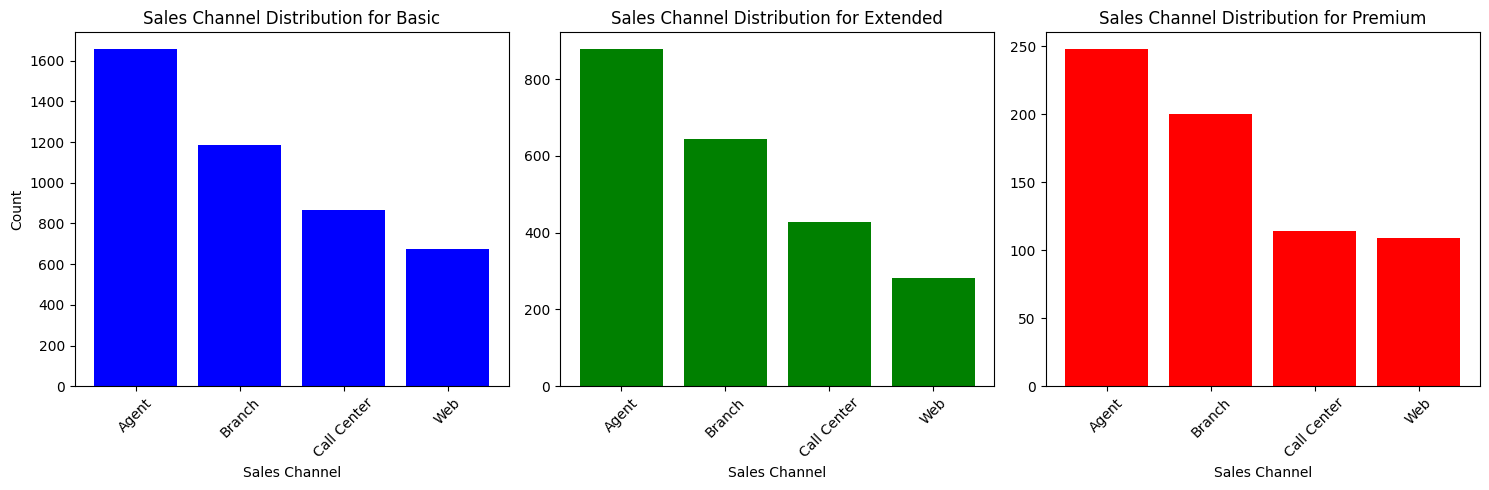

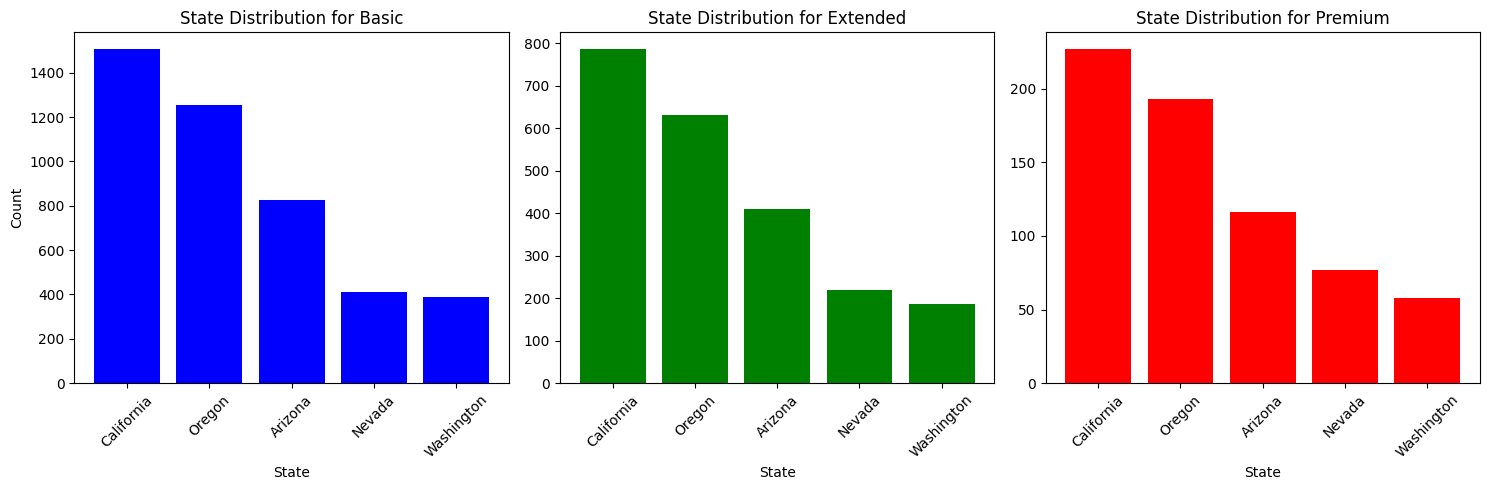

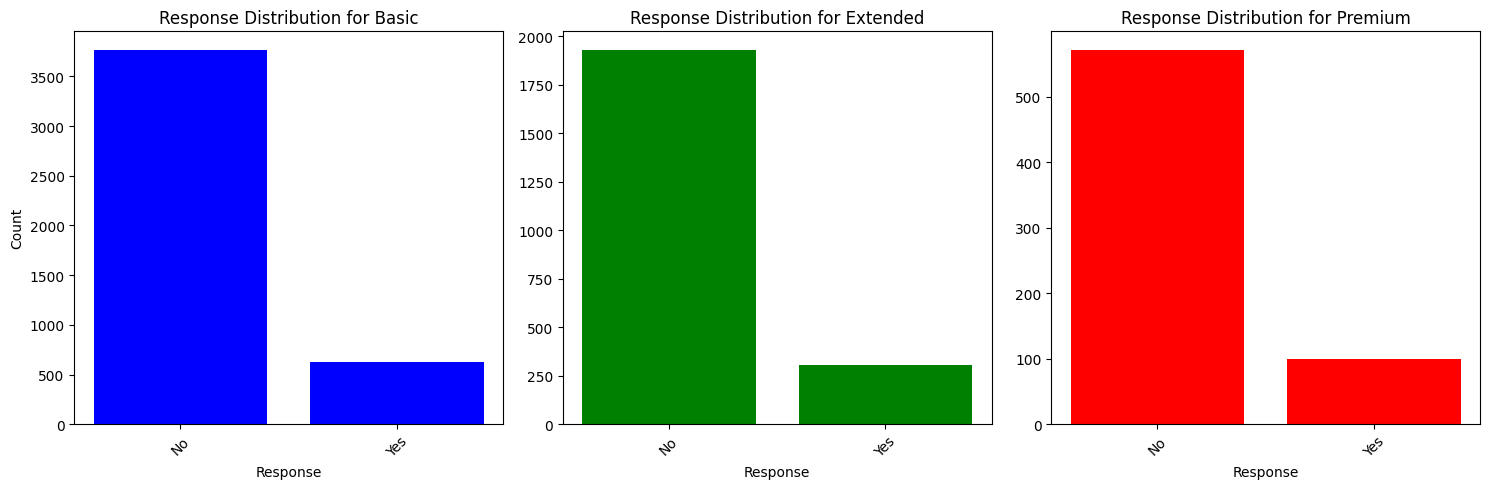

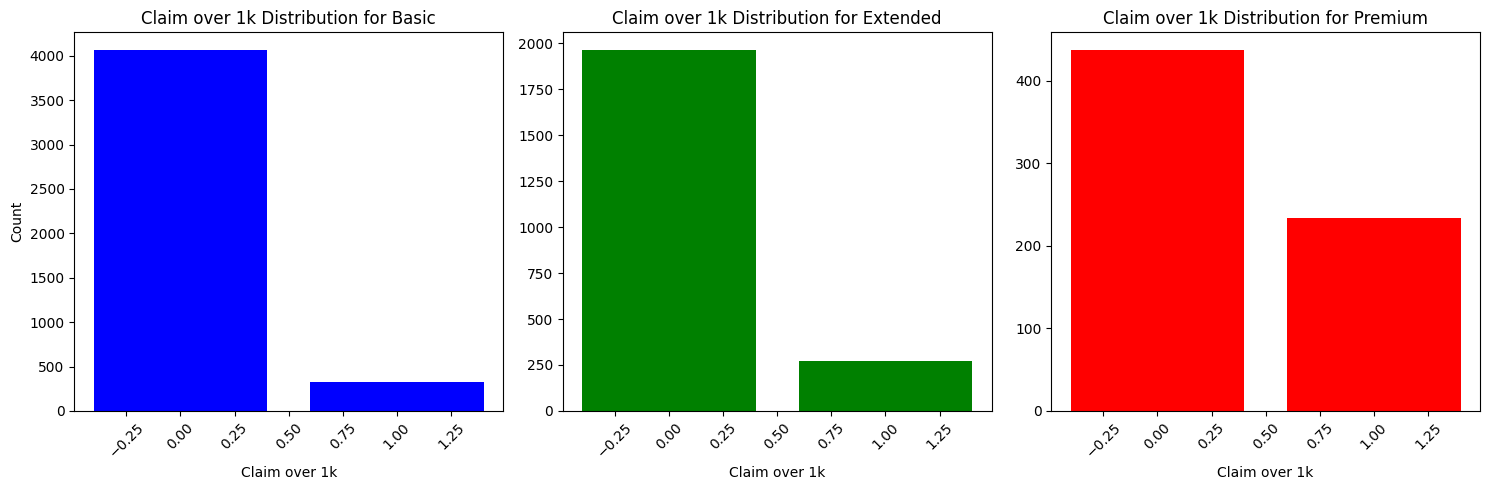

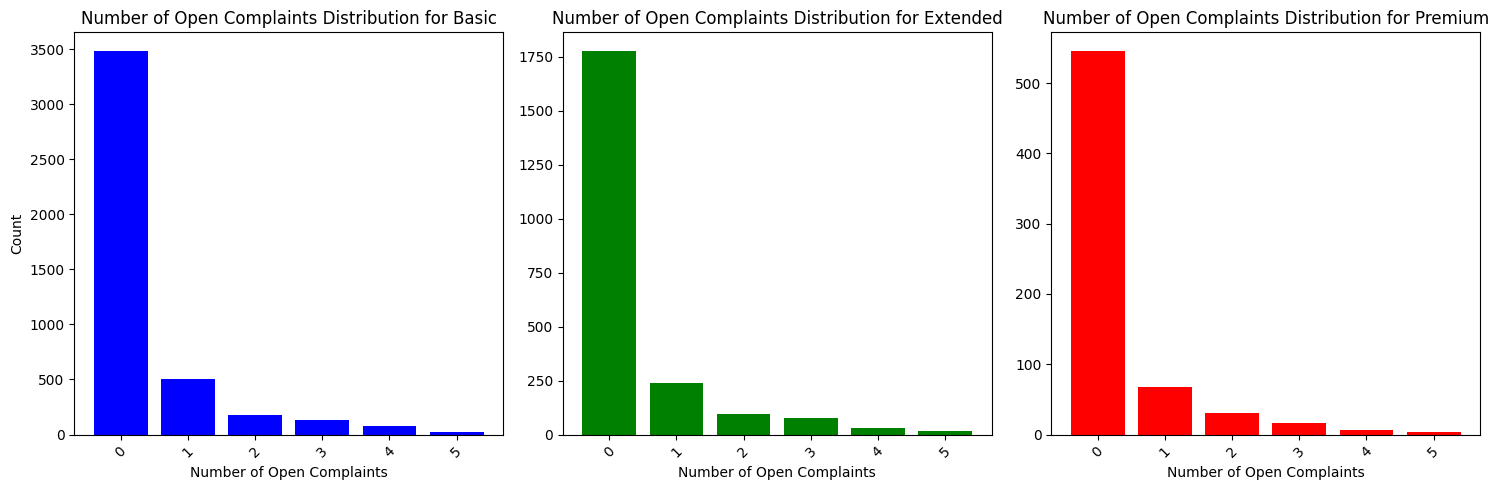

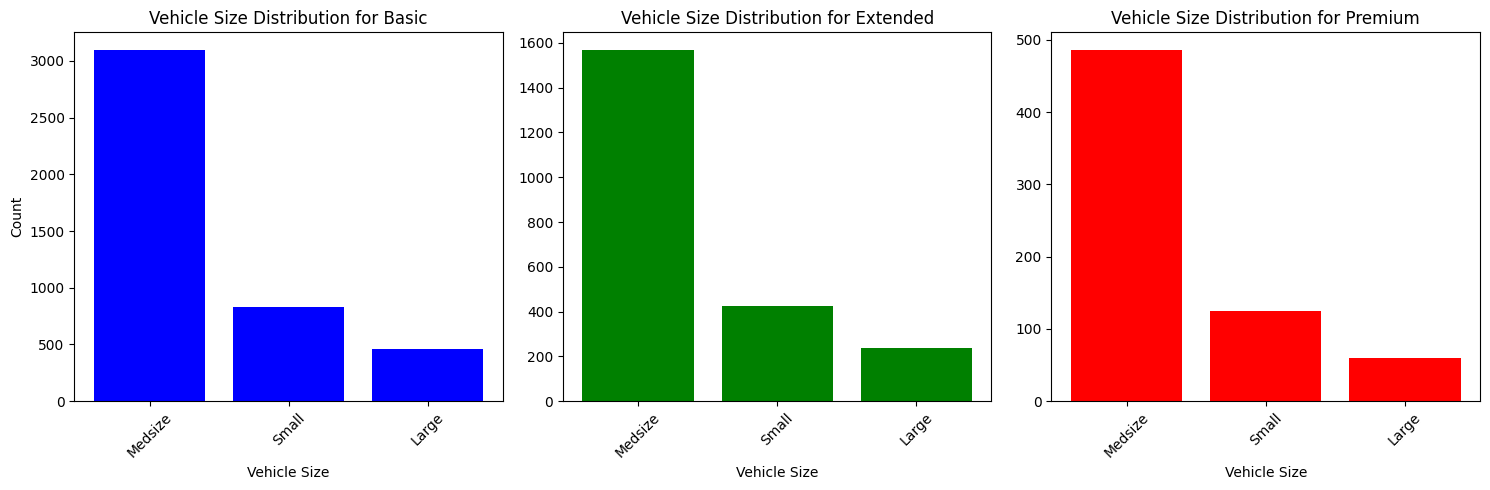

In [34]:
plot_coverage('Education')
plot_coverage('Employment Status')
plot_coverage('Sales Channel')
plot_coverage('State')
plot_coverage('Response')
plot_coverage('Claim over 1k')
plot_coverage('Number of Open Complaints')
plot_coverage('Vehicle Size')

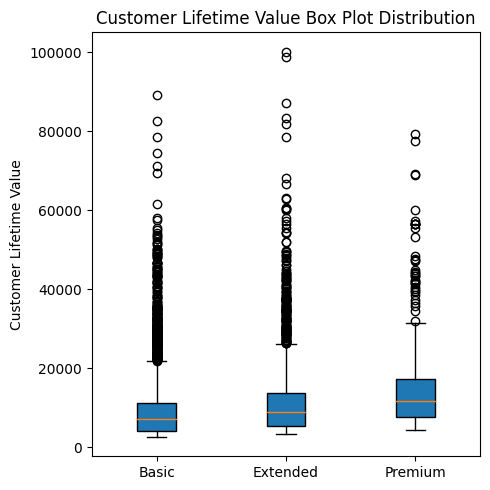

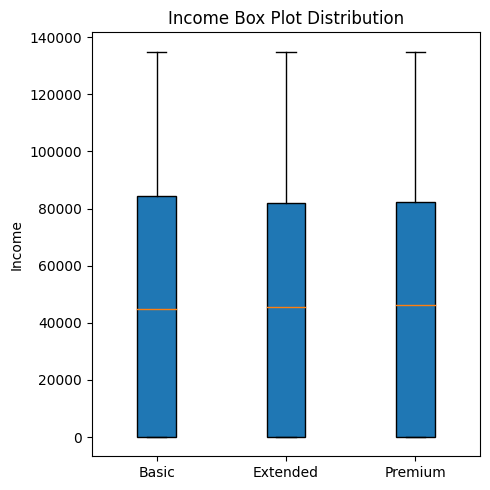

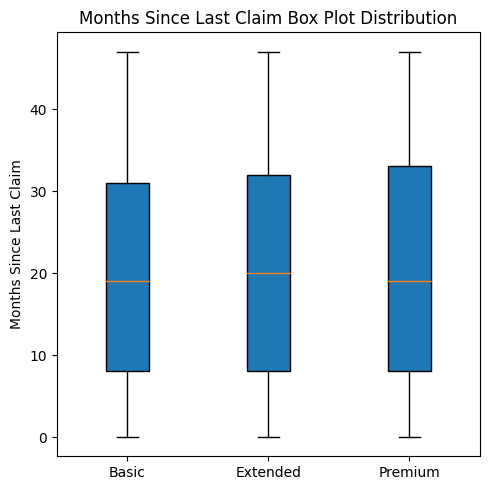

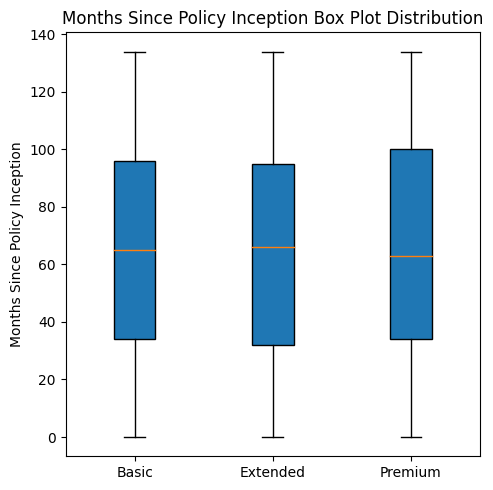

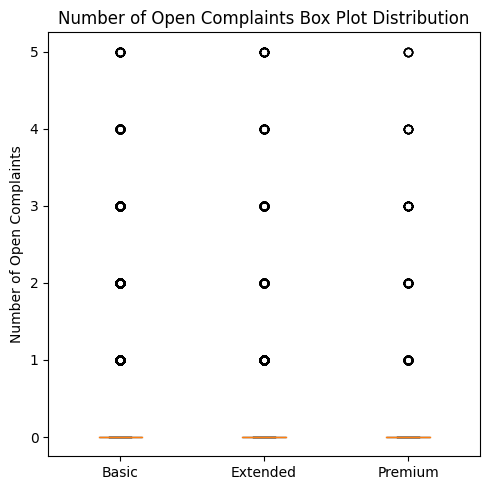

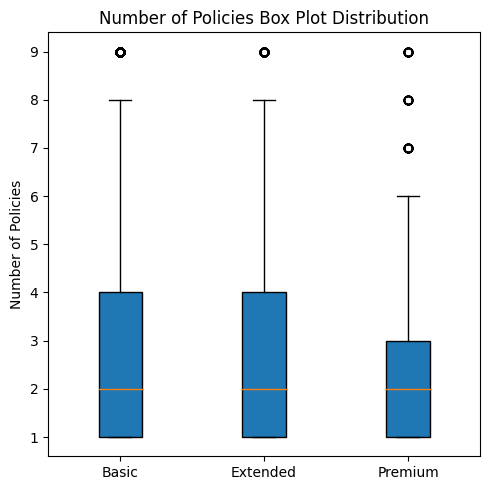

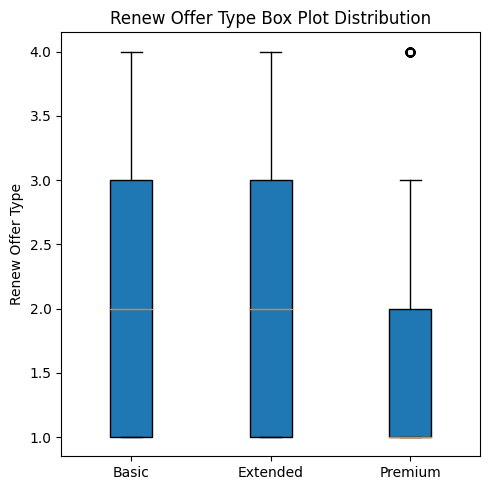

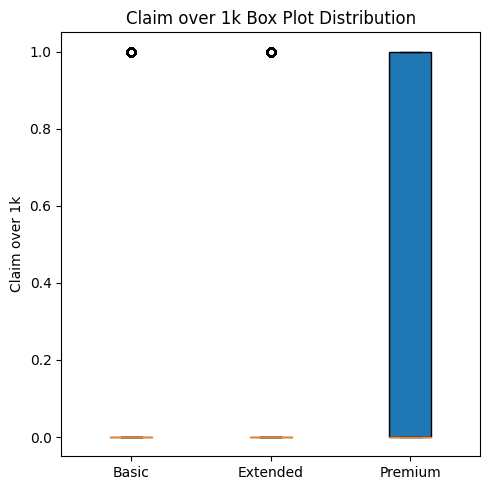

In [35]:
for feature in actual_numeric_cols:
    plot_coverage_cont(feature)

In [36]:
df_premium['Claim over 1k'].value_counts(), df_basic['Claim over 1k'].value_counts(), df_extended['Claim over 1k'].value_counts()

(Claim over 1k
 0    437
 1    234
 Name: count, dtype: int64,
 Claim over 1k
 0    4060
 1     327
 Name: count, dtype: int64,
 Claim over 1k
 0    1961
 1     271
 Name: count, dtype: int64)

## Each policy type

In [37]:
df_personal = df[df['Policy Type']=='Personal Auto']
df_corporate = df[df['Policy Type']=='Corporate Auto']
df_special = df[df['Policy Type']=='Special Auto']

In [38]:
df_personal.shape, df_corporate.shape, df_special.shape

((5416, 29), (1561, 29), (313, 29))

In [39]:
def plot_policy_levels(input_feature):
    edu_l1 = df_personal[input_feature].value_counts()
    edu_l2 = df_corporate[input_feature].value_counts()
    edu_l3 = df_special[input_feature].value_counts()

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].bar(edu_l1.index, edu_l1.values, color='blue')
    ax[0].set_title(input_feature + ' Distribution for Personal Policies')
    ax[0].set_xlabel(input_feature)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)

    ax[1].bar(edu_l2.index, edu_l2.values, color='green')
    ax[1].set_title(input_feature + ' Distribution for Corporate Policies')
    ax[1].set_xlabel(input_feature)
    ax[1].tick_params(axis='x', rotation=45)

    ax[2].bar(edu_l3.index, edu_l3.values, color='red')
    ax[2].set_title(input_feature + ' Distribution for Special Policies')
    ax[2].set_xlabel(input_feature)
    ax[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

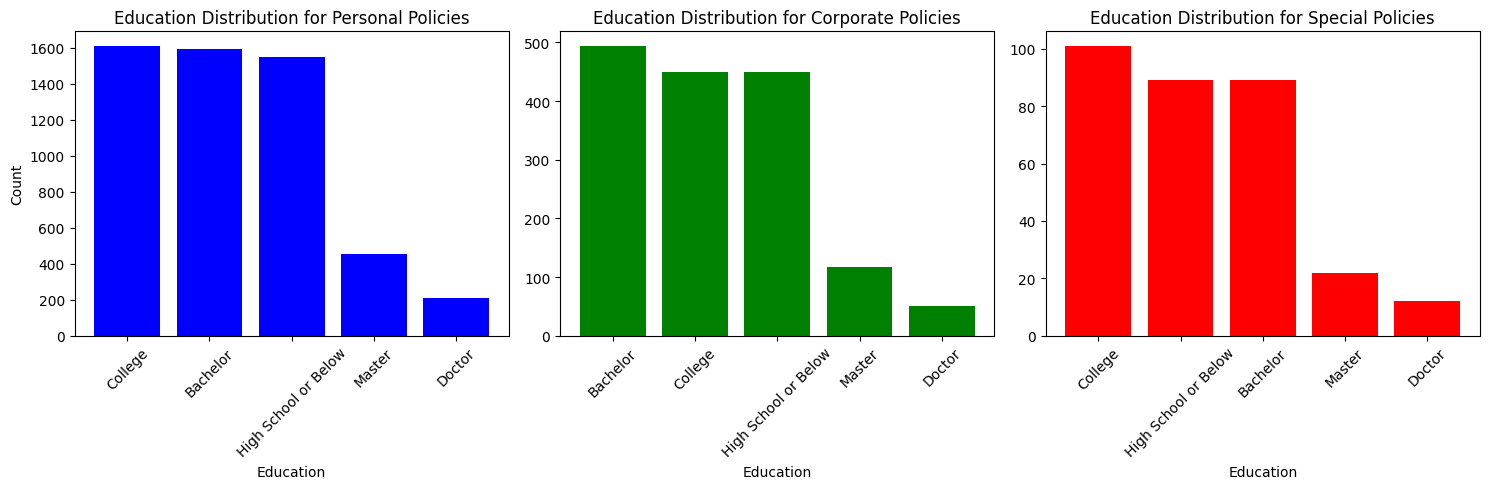

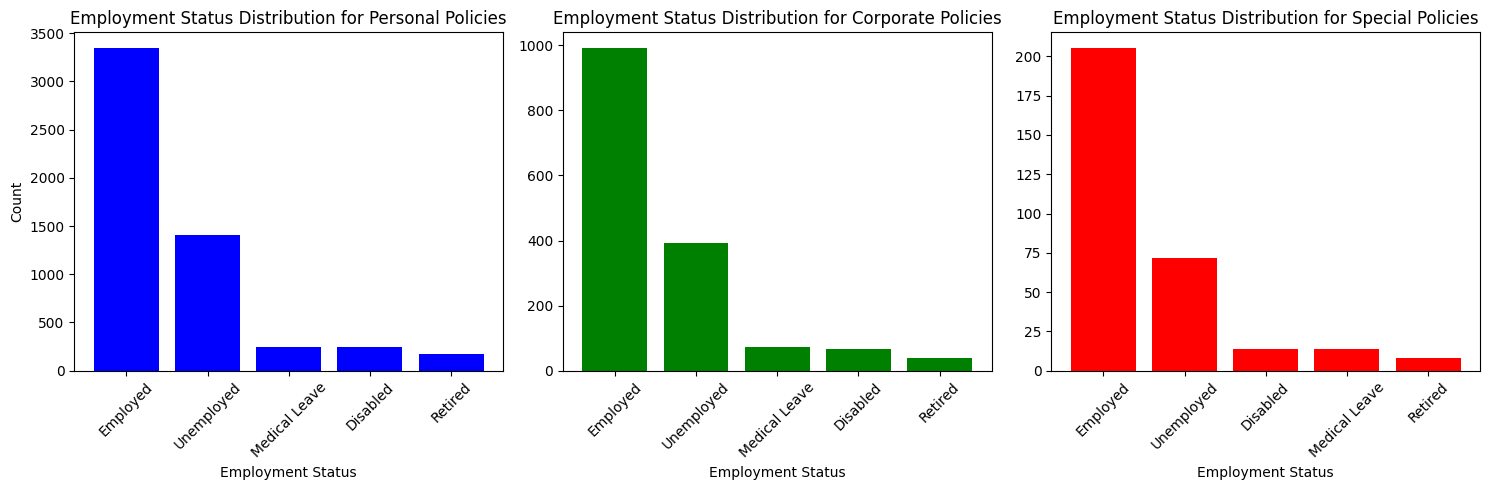

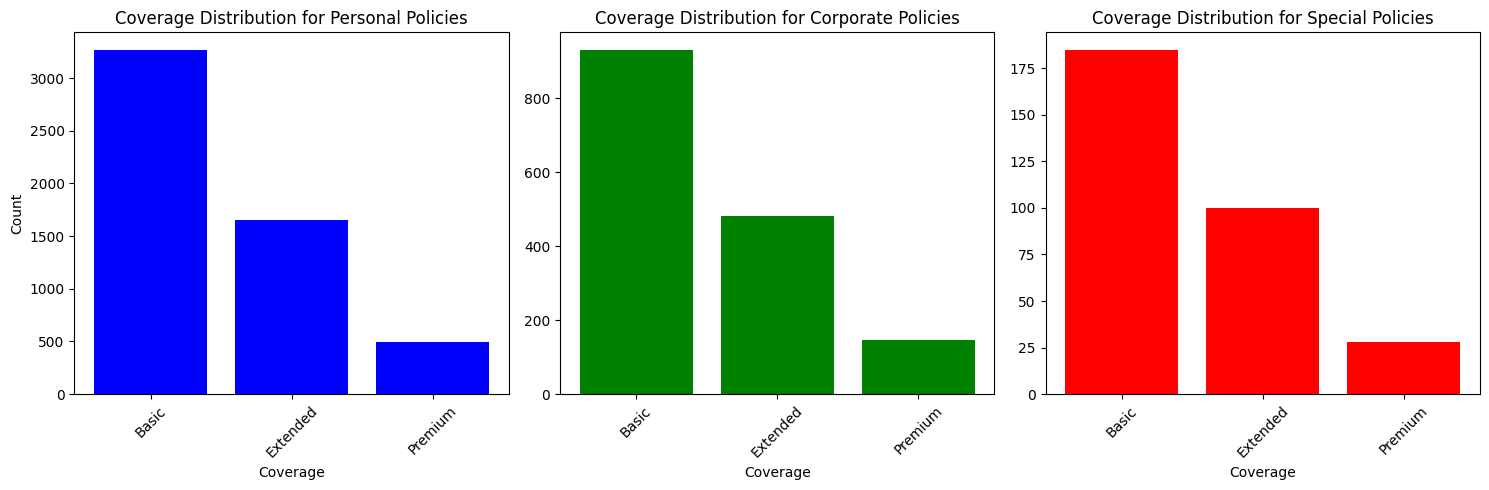

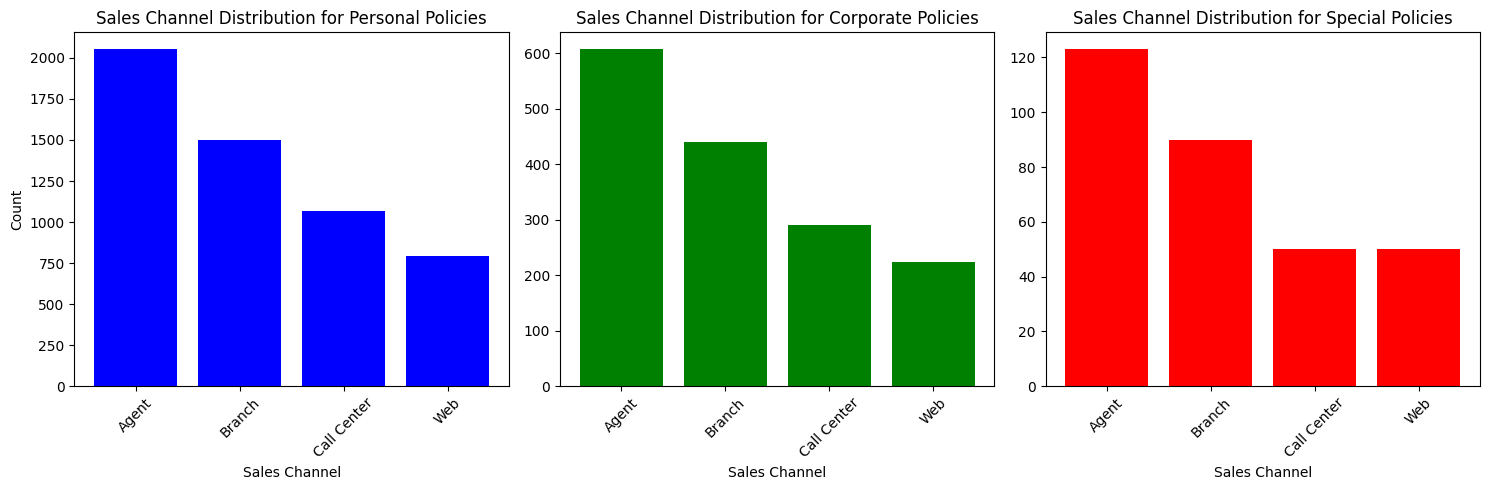

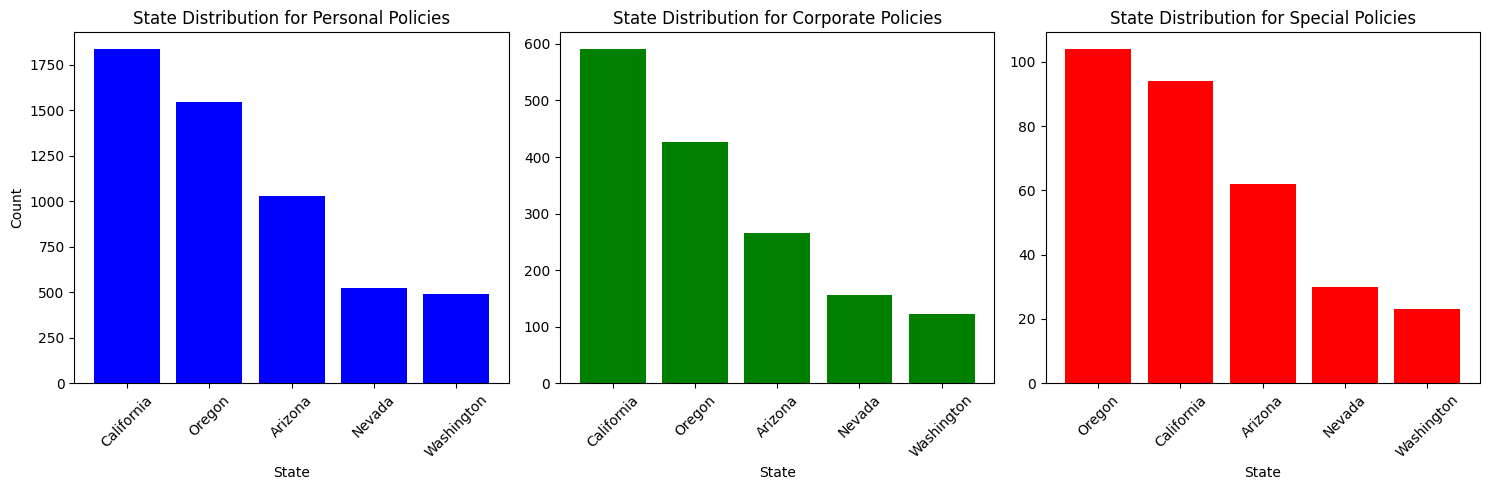

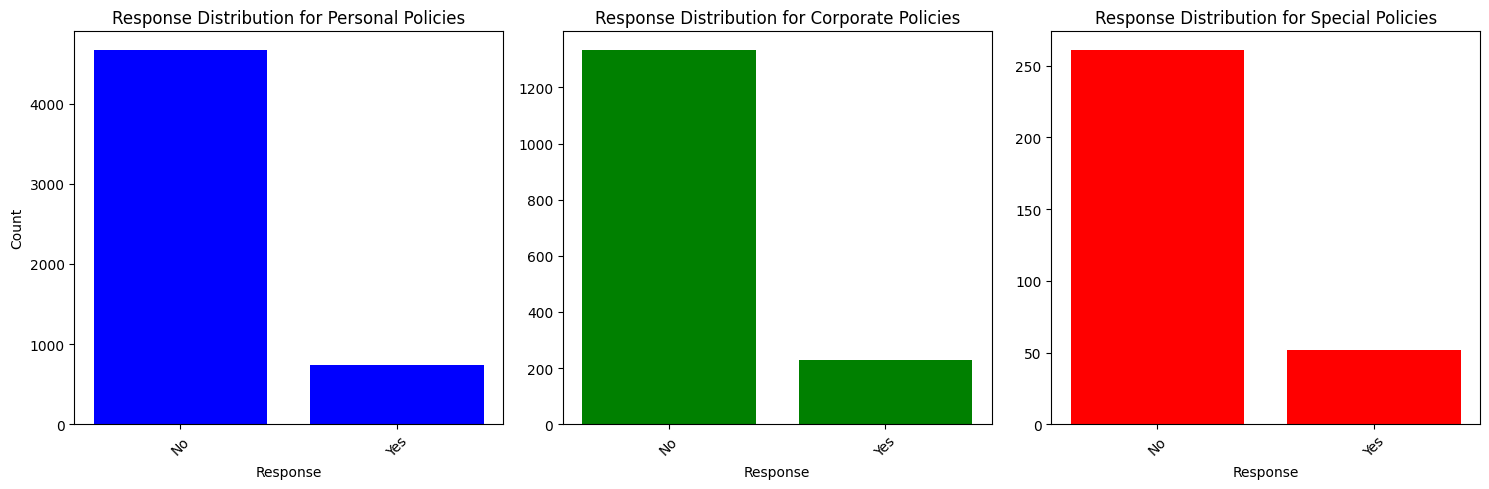

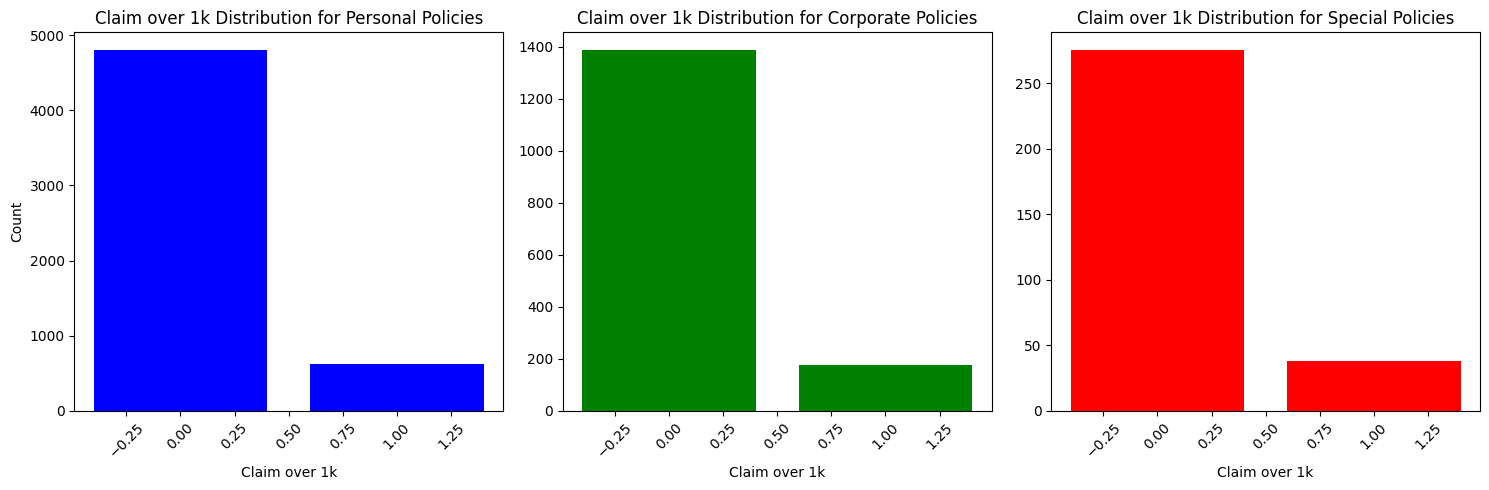

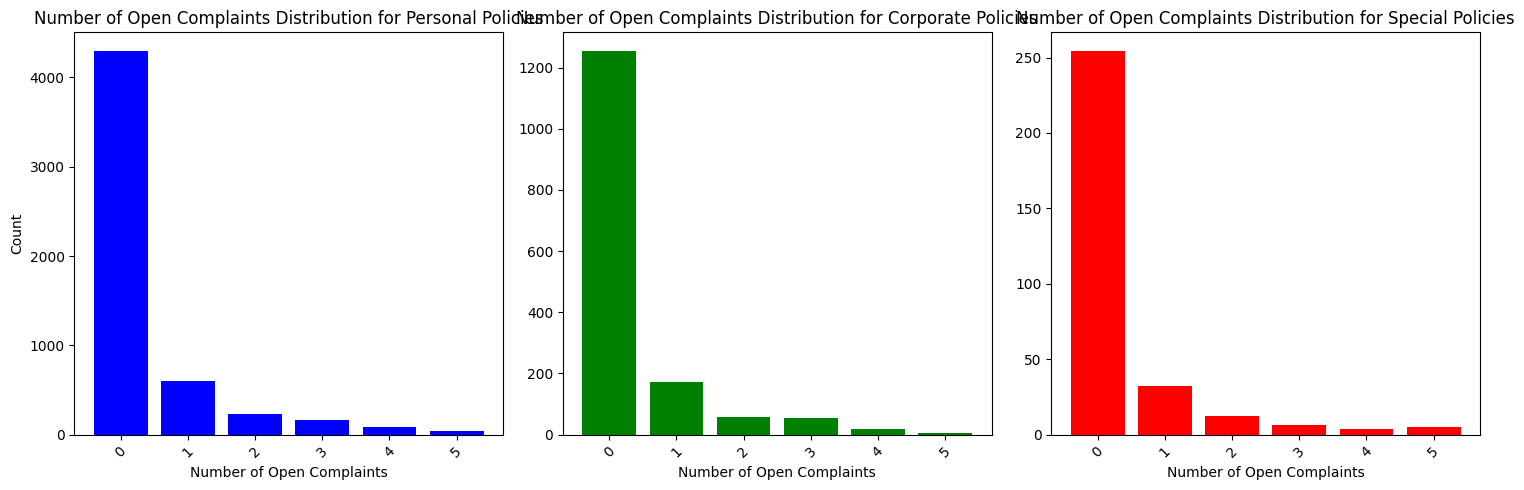

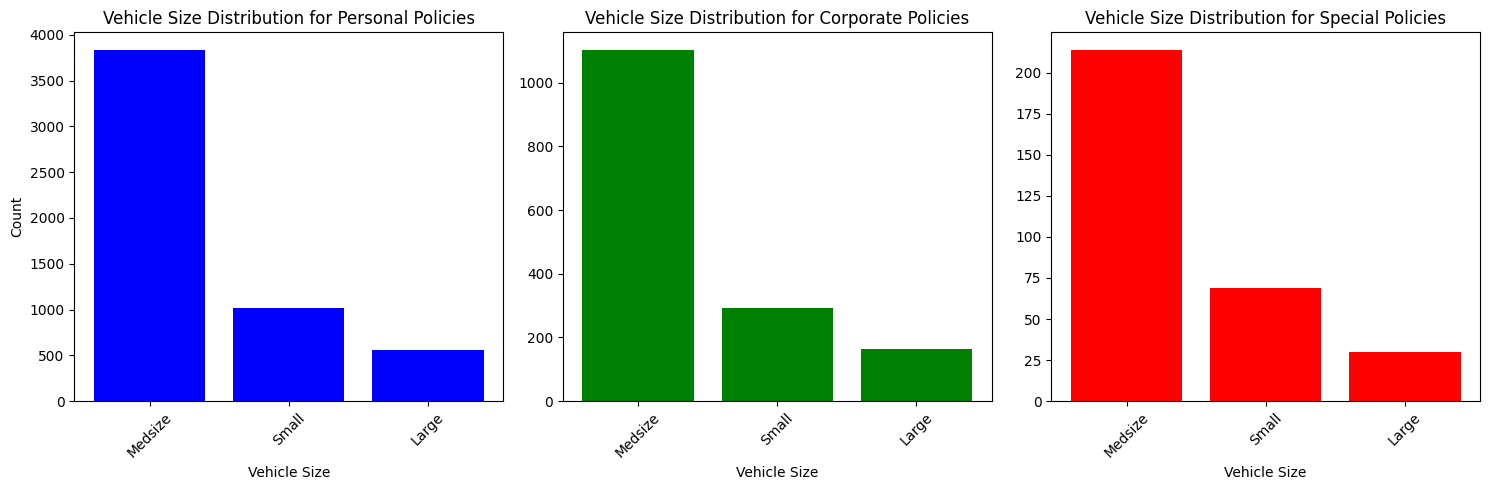

In [40]:
plot_policy_levels('Education')
plot_policy_levels('Employment Status')
plot_policy_levels('Coverage')
plot_policy_levels('Sales Channel')
plot_policy_levels('State')
plot_policy_levels('Response')
plot_policy_levels('Claim over 1k')
plot_policy_levels('Number of Open Complaints')
plot_policy_levels('Vehicle Size')

In [41]:
def plot_policy_levels(input_feature):

    values_l1 = df_l1[input_feature].dropna()
    values_l2 = df_l2[input_feature].dropna()
    values_l3 = df_l3[input_feature].dropna()

    fig, ax = plt.subplots(figsize=(5, 5))

    data = [values_l1, values_l2, values_l3]

    ax.boxplot(data, patch_artist=True, labels=['L1 Policies', 'L2 Policies', 'L3 Policies'])

    ax.set_title(input_feature + ' Box Plot Distribution')
    ax.set_ylabel(input_feature)

    plt.tight_layout()
    plt.show()

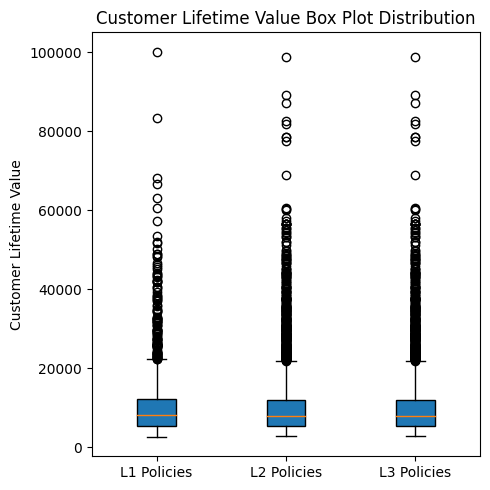

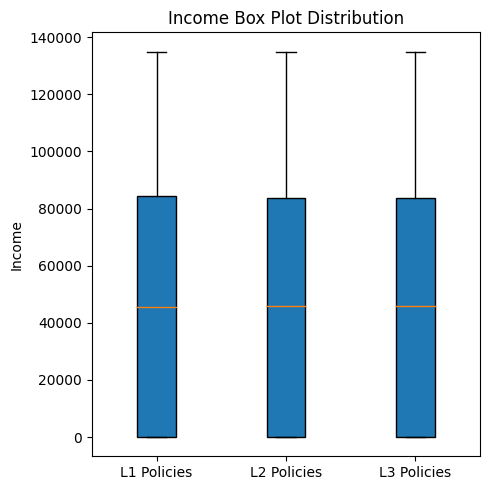

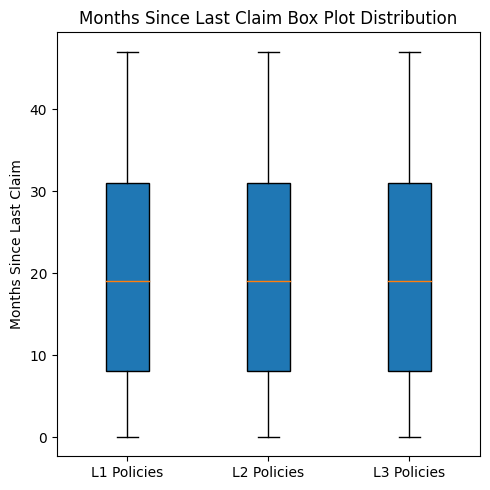

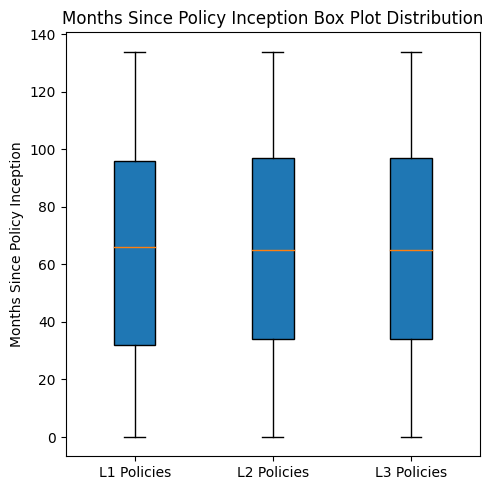

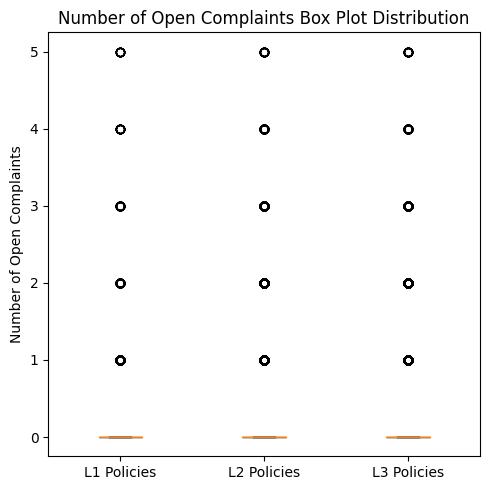

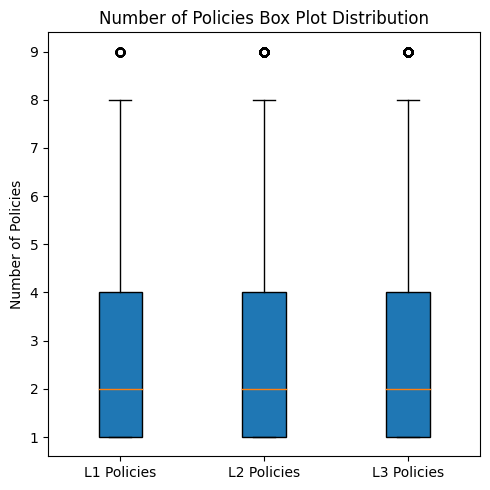

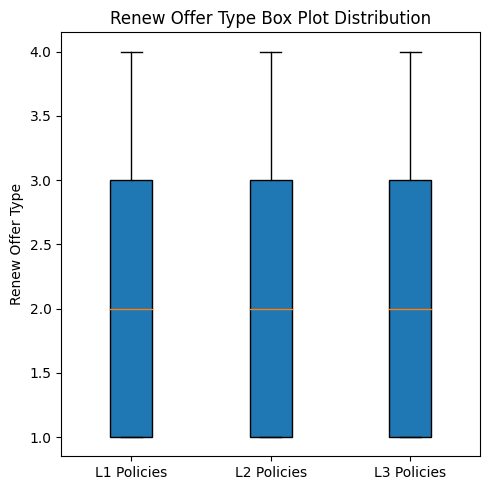

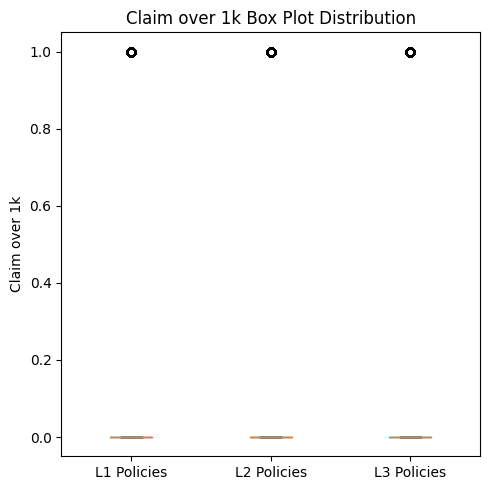

In [42]:
for feature in actual_numeric_cols:
    plot_policy_levels(feature)

## Each Class

In [43]:
df['Claim over 1k'].value_counts()

Claim over 1k
0    6458
1     832
Name: count, dtype: int64

In [44]:
df_over = df[df['Claim over 1k']==1]
df_under = df[df['Claim over 1k']==0]

def plot_claim_levels(input_feature):
    over_values = df_over[input_feature].value_counts()
    under_values = df_under[input_feature].value_counts()

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row and 2 columns

    # Plot for Claims Over 1k
    ax[0].bar(over_values.index, over_values.values, color='blue')
    ax[0].set_title(input_feature + ' Distribution for Claims Over 1k')
    ax[0].set_xlabel(input_feature)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)

    # Plot for Claims Under 1k
    ax[1].bar(under_values.index, under_values.values, color='red')
    ax[1].set_title(input_feature + ' Distribution for Claims Under 1k')
    ax[1].set_xlabel(input_feature)
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_claim_box(input_feature):
    over_values = df_over[input_feature].dropna()
    under_values = df_under[input_feature].dropna()

    fig, ax = plt.subplots(figsize=(7, 5))

    data = [over_values, under_values]

    ax.boxplot(data, patch_artist=True, labels=['Over 1k Claims', 'Under 1k Claims'])

    ax.set_title(input_feature + ' Box Plot Distribution by Claim Levels')
    ax.set_ylabel(input_feature)

    plt.tight_layout()
    plt.show()


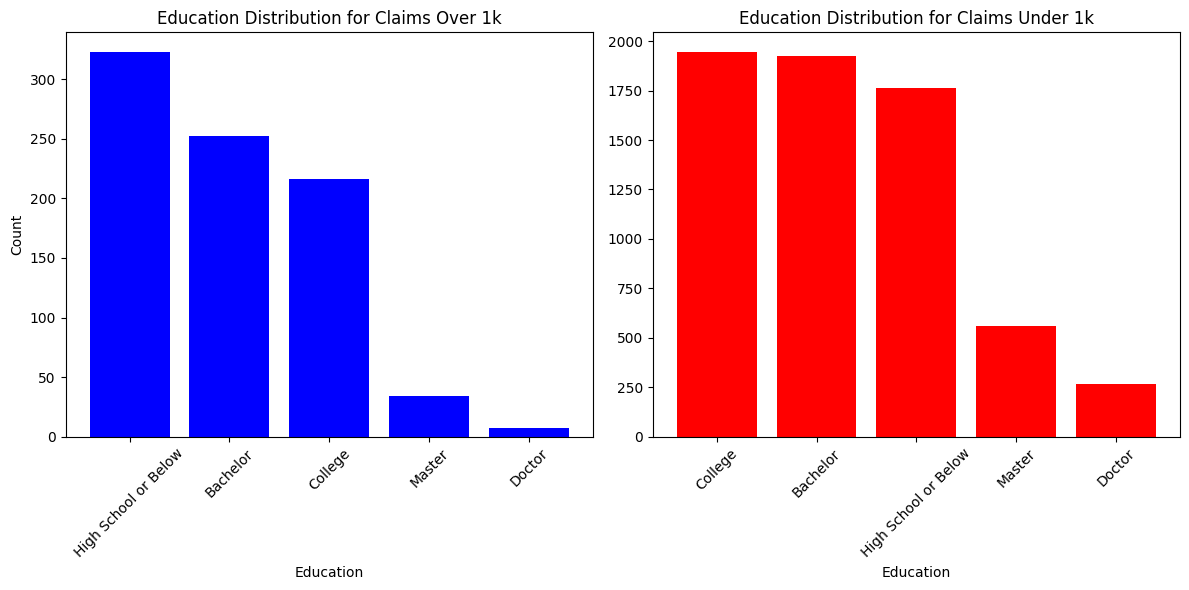

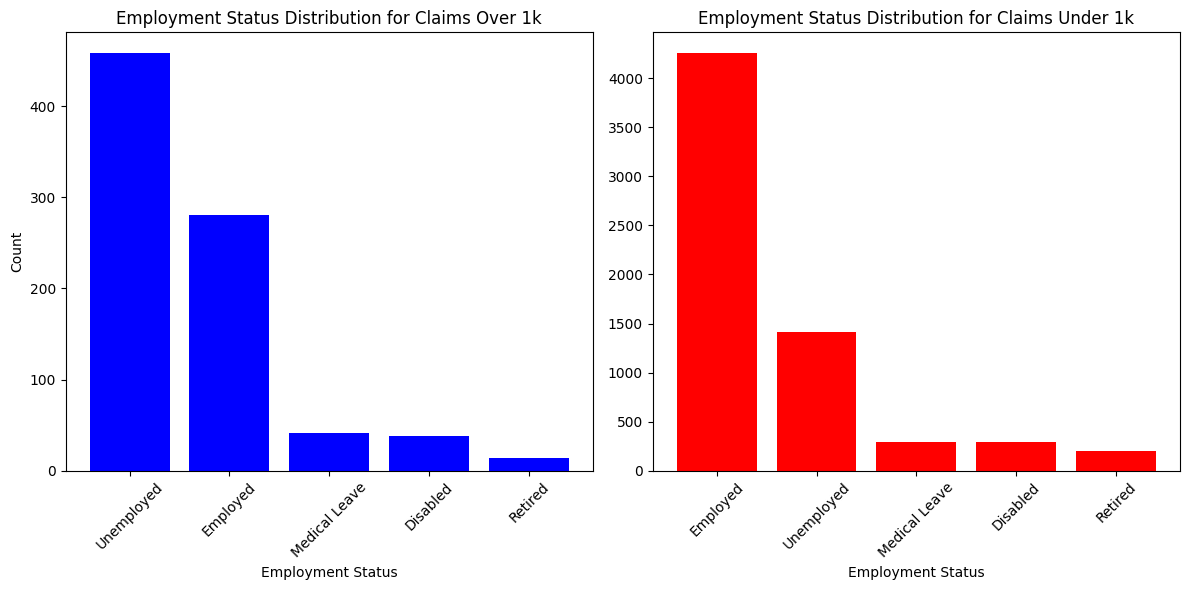

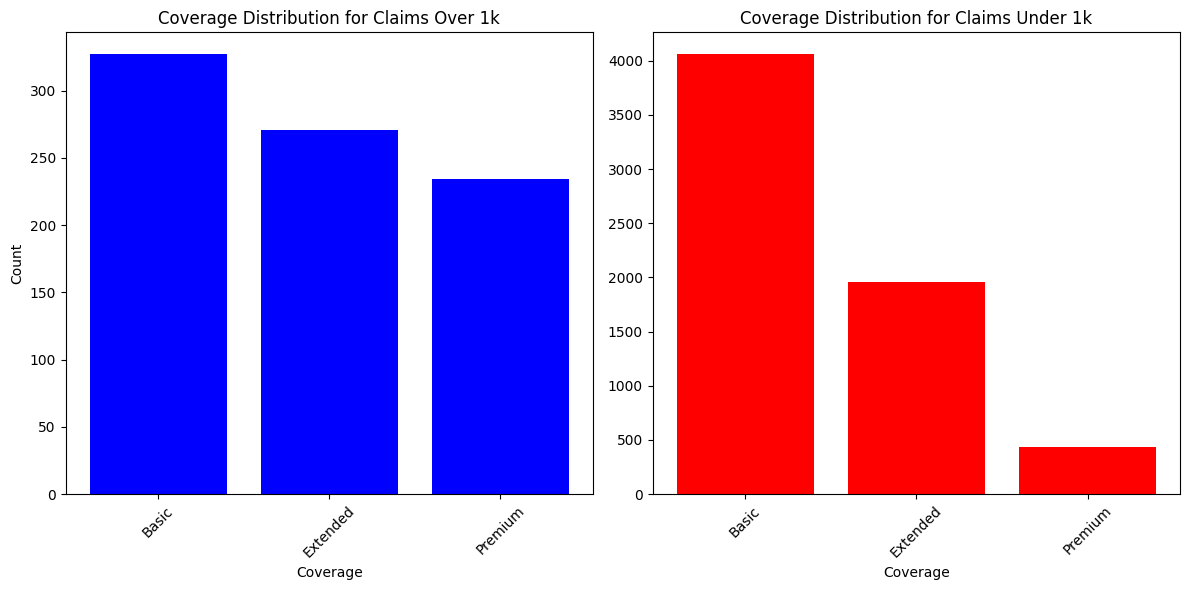

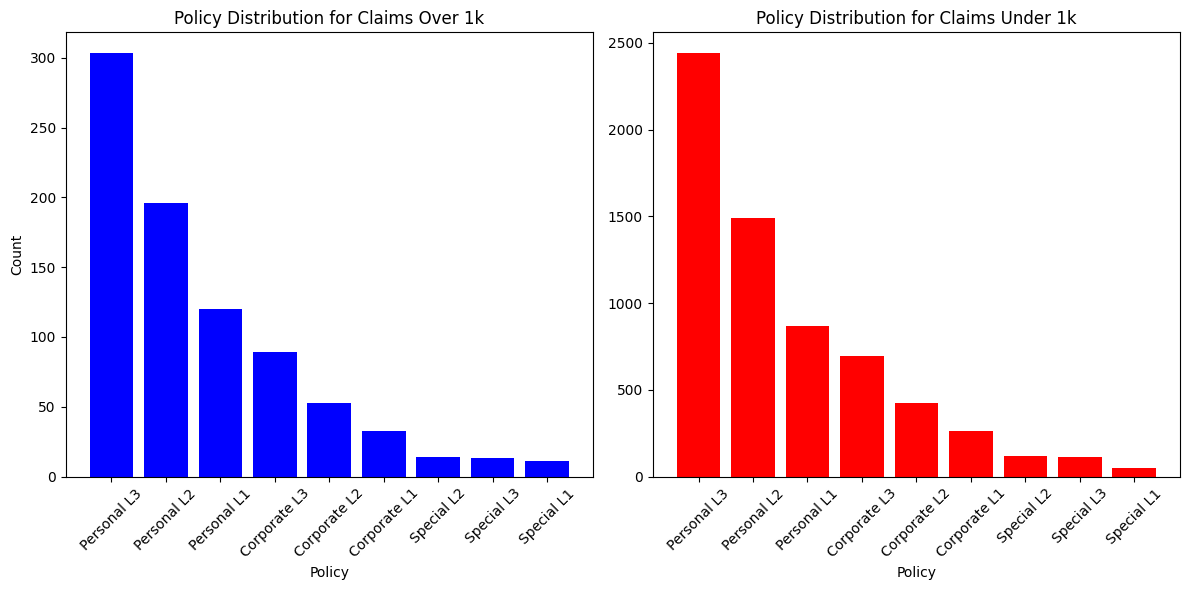

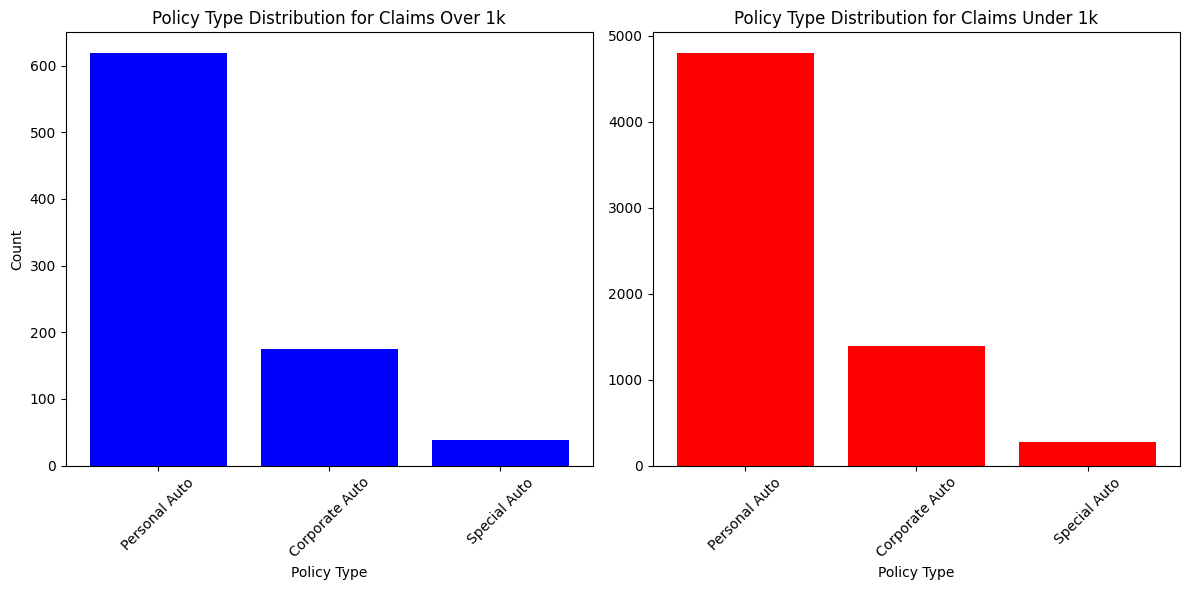

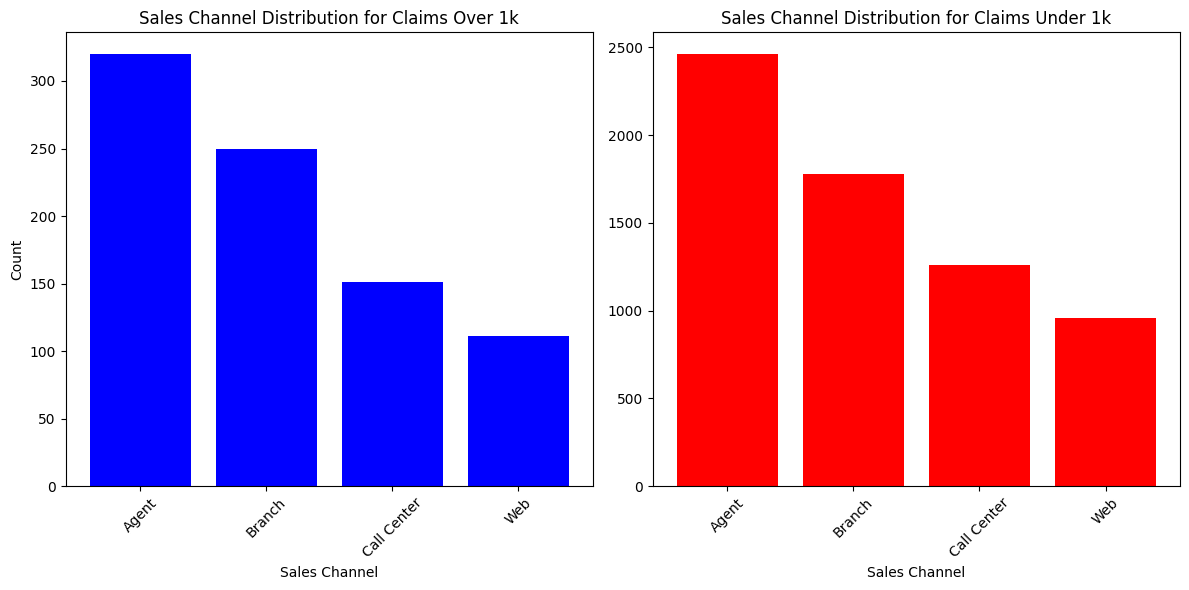

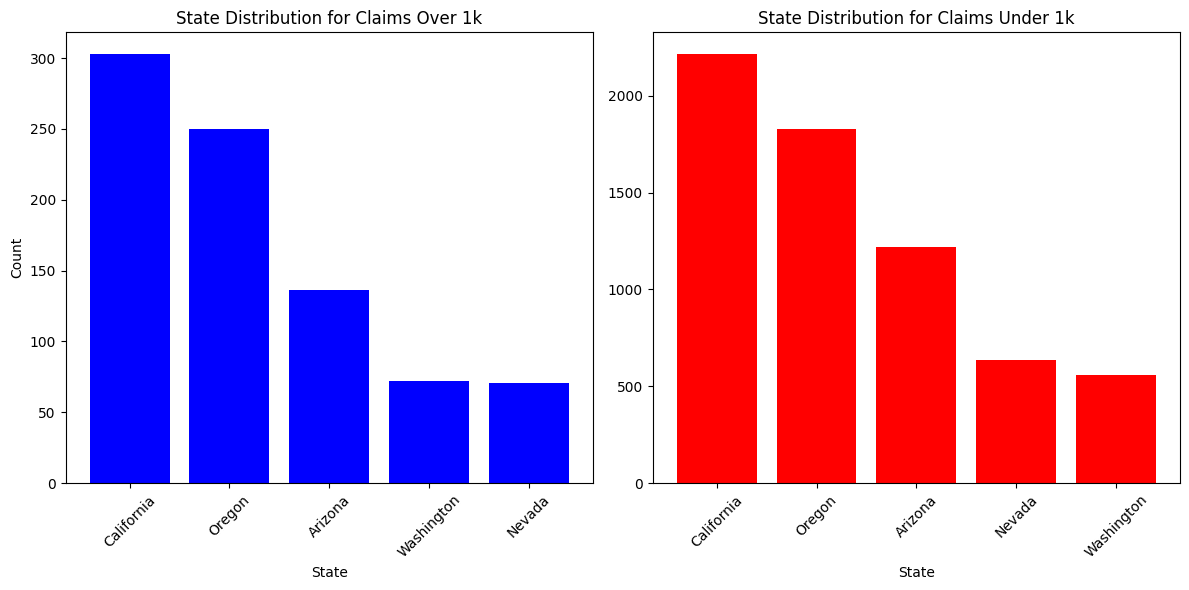

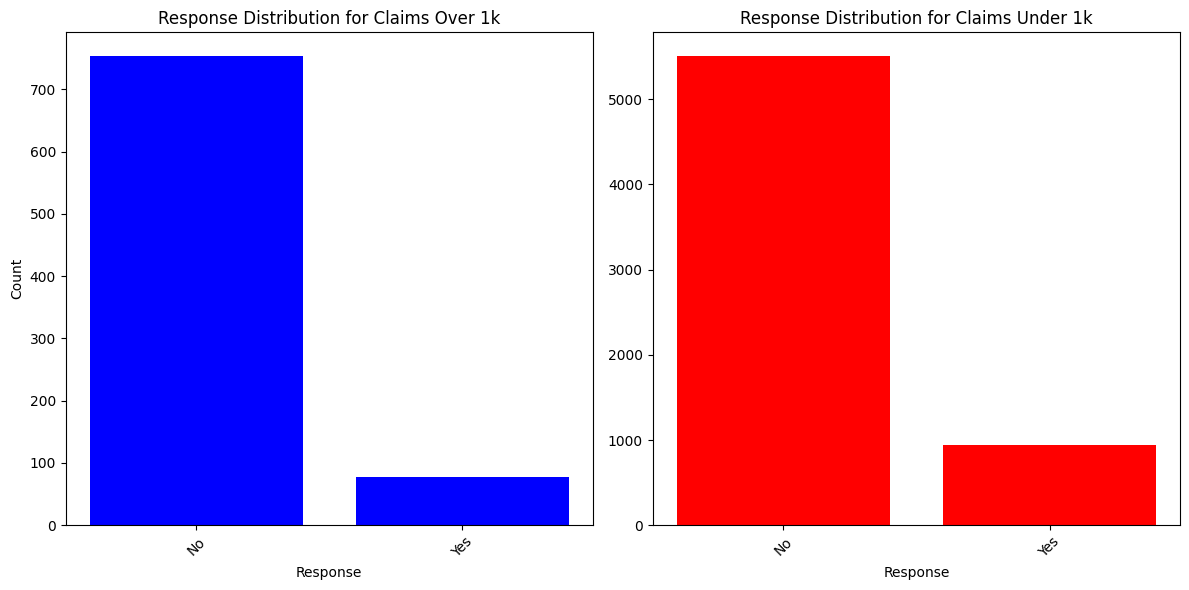

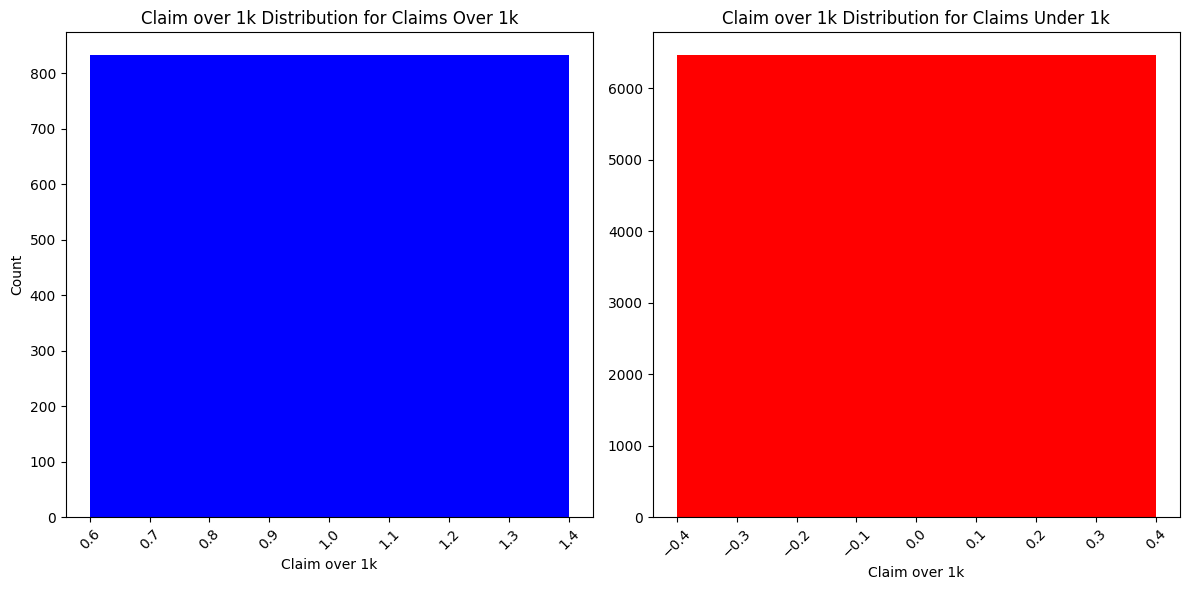

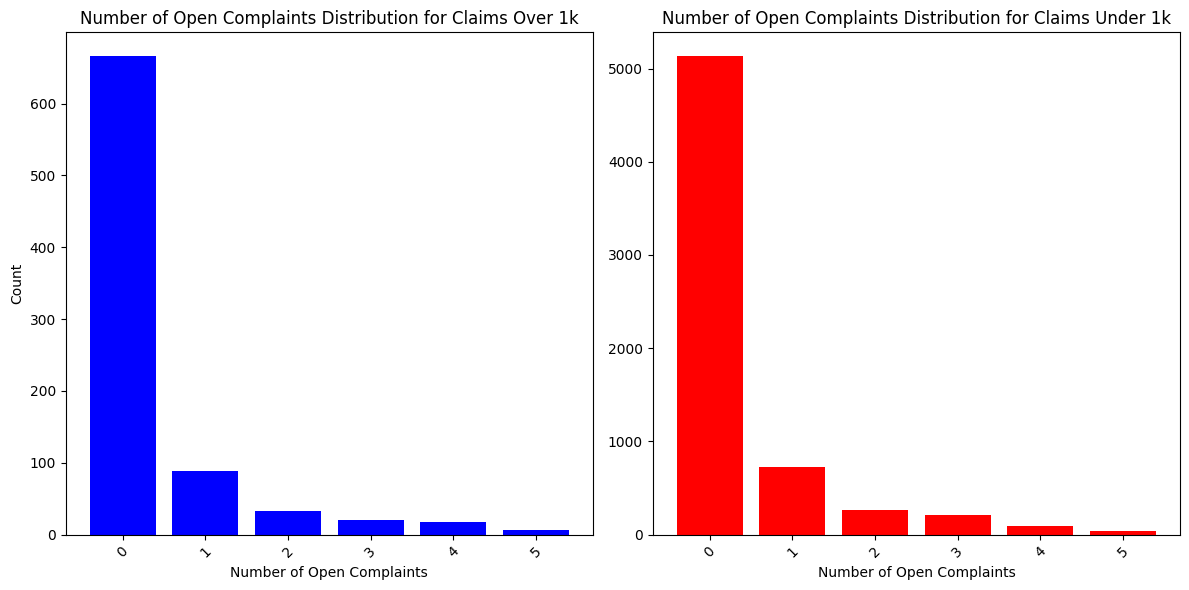

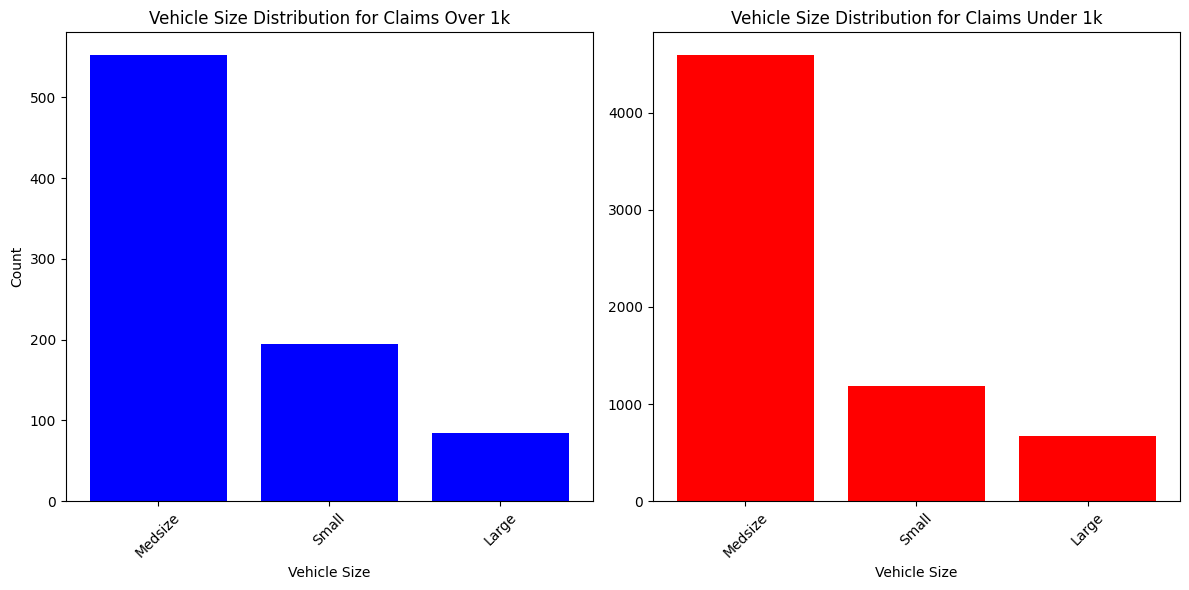

In [45]:
plot_claim_levels('Education')
plot_claim_levels('Employment Status')
plot_claim_levels('Coverage')
plot_claim_levels('Policy')
plot_claim_levels('Policy Type')
plot_claim_levels('Sales Channel')
plot_claim_levels('State')
plot_claim_levels('Response')
plot_claim_levels('Claim over 1k')
plot_claim_levels('Number of Open Complaints')
plot_claim_levels('Vehicle Size')

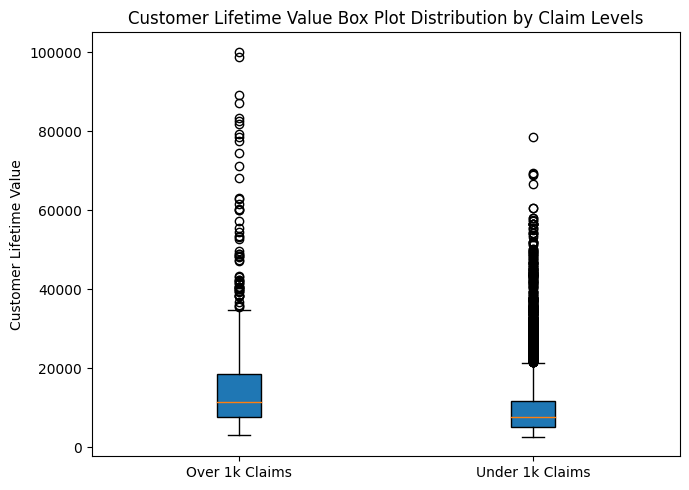

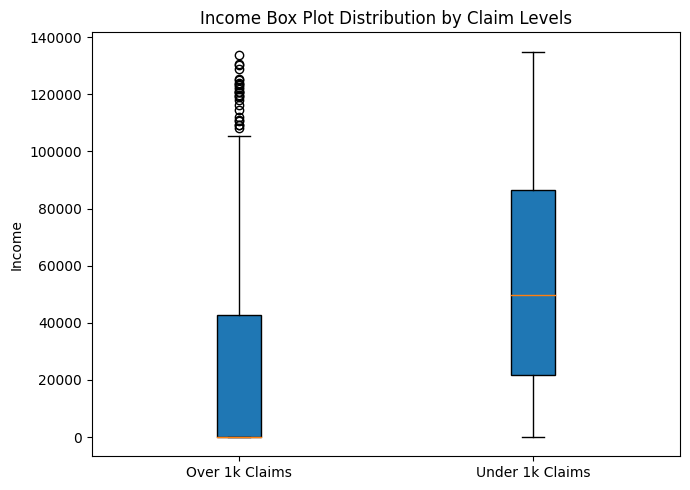

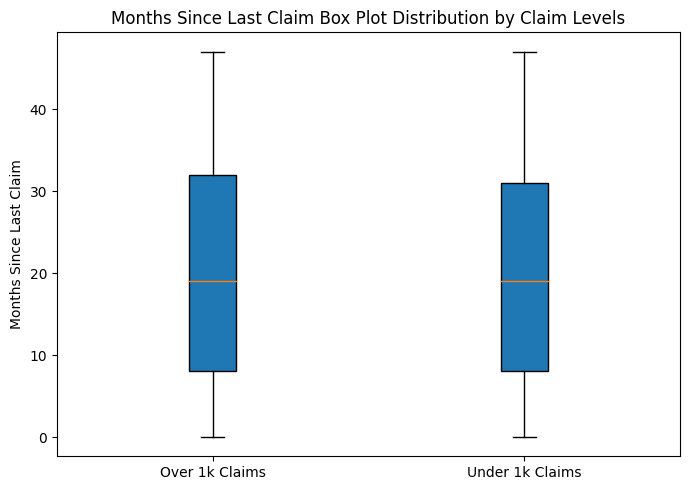

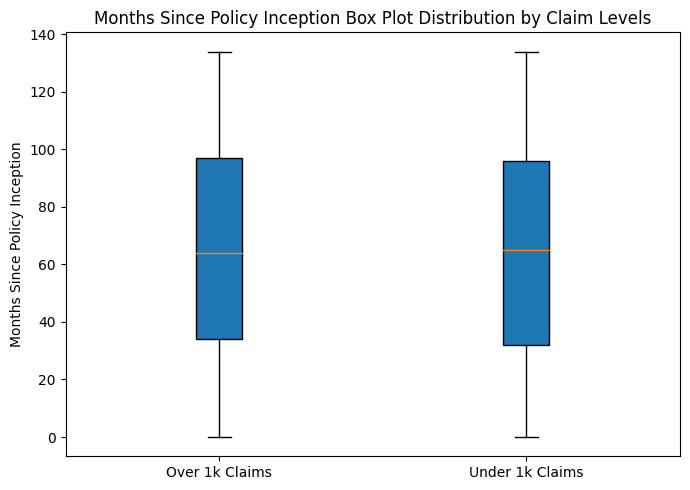

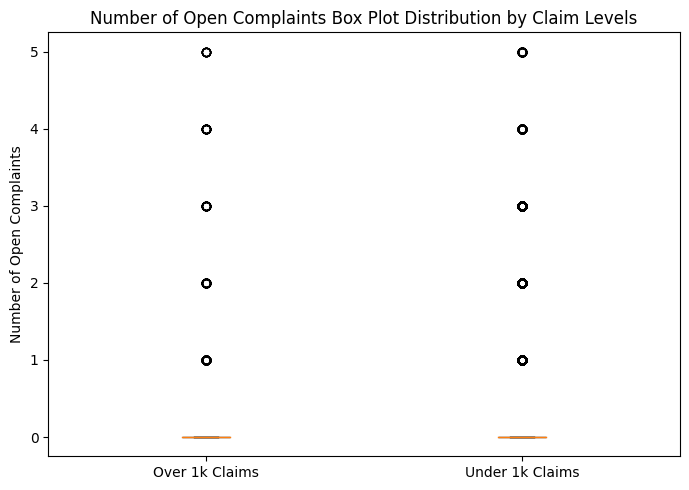

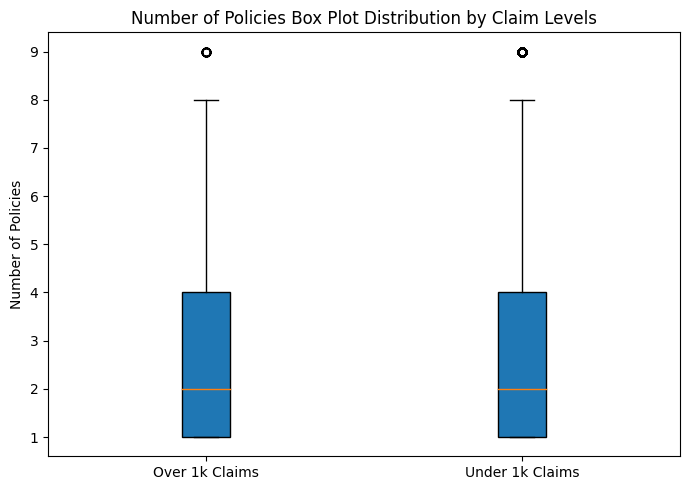

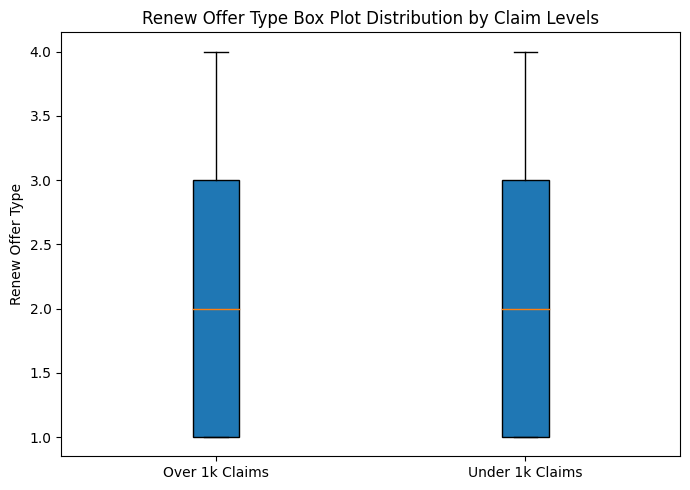

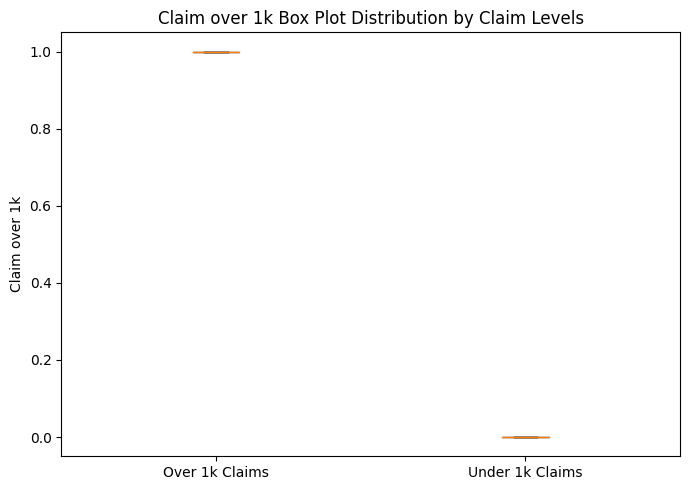

In [46]:
for feature in actual_numeric_cols:
    plot_claim_box(feature)

# Preprocessing

Re encode some features

In [47]:
one_hot_columns = ['Employment Status', 'Marital Status', 'Policy Type', 'Sales Channel', 'State', 'Response', 'Gender']
drop = ['Employment Status Index', 'Marital Status Index', 'Policy Type Index', 'Policy Index', 'Sales Channel Index', 'State', 'Response', 'Gender', 'Coverage', 'Education', 'Policy',
       'Vehicle Size']
df = pd.concat([pd.get_dummies(df[one_hot_columns], drop_first=True), df], axis=1)
df = df.drop(one_hot_columns + drop, axis=1)

In [48]:
df.columns, df.shape

(Index(['Employment Status_Employed', 'Employment Status_Medical Leave',
        'Employment Status_Retired', 'Employment Status_Unemployed',
        'Marital Status_Married', 'Marital Status_Single',
        'Policy Type_Personal Auto', 'Policy Type_Special Auto',
        'Sales Channel_Branch', 'Sales Channel_Call Center',
        'Sales Channel_Web', 'State_California', 'State_Nevada', 'State_Oregon',
        'State_Washington', 'Response_Yes', 'Gender_M', 'CustomerID',
        'Customer Lifetime Value', 'Coverage Index', 'Education Index',
        'Effective To Date', 'Income', 'Months Since Last Claim',
        'Months Since Policy Inception', 'Number of Open Complaints',
        'Number of Policies', 'Renew Offer Type', 'Vehicle Size Index',
        'Claim over 1k'],
       dtype='object'),
 (7290, 30))

In [49]:
numeric_cols = df.select_dtypes(include=['number', 'bool']).columns
categoric_cols = df.select_dtypes(exclude=['number', 'bool']).columns
print(len(numeric_cols), len(categoric_cols))
print(numeric_cols)
print(categoric_cols)

28 2
Index(['Employment Status_Employed', 'Employment Status_Medical Leave',
       'Employment Status_Retired', 'Employment Status_Unemployed',
       'Marital Status_Married', 'Marital Status_Single',
       'Policy Type_Personal Auto', 'Policy Type_Special Auto',
       'Sales Channel_Branch', 'Sales Channel_Call Center',
       'Sales Channel_Web', 'State_California', 'State_Nevada', 'State_Oregon',
       'State_Washington', 'Response_Yes', 'Gender_M',
       'Customer Lifetime Value', 'Coverage Index', 'Education Index',
       'Income', 'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type',
       'Vehicle Size Index', 'Claim over 1k'],
      dtype='object')
Index(['CustomerID', 'Effective To Date'], dtype='object')


encode date data...

# Modeling

In [50]:
# for col in categoric_cols:
#     df[col] = df[col].astype('category')
#     df_test[col] = df_test[col].astype('category')

In [51]:
# from sklearn.utils import resample
# X = df[list(df.columns)[:-1]]
# y = df[['Claim over 1k']]
# X_majority = X[df['Claim over 1k'] == 0]
# y_majority = y[df['Claim over 1k'] == 0]
# X_minority = X[df['Claim over 1k'] == 1]
# y_minority = y[df['Claim over 1k'] == 1]
# X_minority_upsampled, y_minority_upsampled = resample(X_minority, y_minority, 
#                                                       replace=True, 
#                                                       n_samples=X_majority.shape[0],
#                                                       random_state=1)
# X_bal = pd.concat([X_majority, X_minority_upsampled])
# y_bal = pd.concat([y_majority, y_minority_upsampled])

# X_bal_personal = X_bal[X_bal['Policy Type'] == 'Personal Auto']
# y_bal_personal = y_bal[X_bal['Policy Type'] == 'Personal Auto']

# X_bal_corporate_special = X_bal[X_bal['Policy Type'] != 'Personal Auto']
# y_bal_corporate_special = y_bal[X_bal['Policy Type'] != 'Personal Auto']

# X_train_personal, X_test_personal, y_train_personal, y_test_personal = train_test_split(
#     X_bal_personal, y_bal_personal, test_size=0.2
# )

# X_train_corporate_special, X_test_corporate_special, y_train_corporate_special, y_test_corporate_special = train_test_split(
#     X_bal_corporate_special, y_bal_corporate_special, test_size=0.2
# )

In [52]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [53]:
# pip install lightgbm

In [54]:
# import lightgbm as lgb
# lgbm_personal = lgb.LGBMClassifier(max_depth=3, n_jobs=-1, n_estimators=500, learning_rate=0.3)
# lgbm_personal.fit(X_train_personal, y_train_personal)
# y_hat = lgbm_personal.predict(X_test_personal)
# print(accuracy_score(y_hat, y_test_personal))

# lgbm_corporate_special = lgb.LGBMClassifier(max_depth=3, n_jobs=-1, n_estimators=500, learning_rate=0.3)
# lgbm_corporate_special.fit(X_train_corporate_special, y_train_corporate_special)
# y_hat = lgbm_corporate_special.predict(X_test_corporate_special)
# print(accuracy_score(y_hat, y_test_corporate_special))

In [55]:
# X.shape, df_test.shape

In [56]:
# from sklearn.metrics import confusion_matrix
# conf_matrix = confusion_matrix(y_test, y_hat)
# conf_matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [57]:
# df_test_personal = df_test[df_test['Policy Type'] == 'Personal Auto']
# df_test_special_corporate = df_test[df_test['Policy Type'] != 'Personal Auto']

In [58]:
# lgbm_personal = lgb.LGBMClassifier(max_depth=3, n_jobs=-1, n_estimators=500, learning_rate=0.3)
# lgbm_personal.fit(X_bal_personal, y_bal_personal)
# y_hat_personal = lgbm_personal.predict(df_test_personal)

# lgbm_corporate_special = lgb.LGBMClassifier(max_depth=3, n_jobs=-1, n_estimators=500, learning_rate=0.3)
# lgbm_corporate_special.fit(X_bal_corporate_special, y_bal_corporate_special)
# y_hat_corporate_special = lgbm_corporate_special.predict(df_test_special_corporate)

In [59]:
# lgbm_person = lgb.LGBMClassifier(max_depth=3, n_jobs=-1, n_estimators=500, learning_rate=0.3)
# lgbm.fit(X_bal, y_bal)
# pred = lgbm.predict(df_test)

In [60]:
# submit_csv = pd.DataFrame({'CustomerID': list(df_test['CustomerID'].values),
#              'Claim over 1k': list(y_hat_personal) + list(y_hat_corporate_special)}).set_index('CustomerID')

In [61]:
# submit_csv.to_csv('submit.csv')